##Install and import dependencies

In [1]:
!pip install pulp==2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.2/39.2 MB 7.2 MB/s eta 0:00:00


In [2]:
!pip install numpy pandas matplotlib scipy

In [ ]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

## Functions definition

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# def plotear(weights):
#     # Ajustamos el tamaño de la figura
#     fig, ax = plt.subplots(figsize=(12, 8))  # Cambia los valores para ajustar el tamaño

#     # Ajustamos el ancho de las barras
#     bar_width = 0.6  # Este valor se puede ajustar para hacer las barras más anchas o angostas

#     # Para cada máquina que representa un bin, ploteamos todos sus valores
#     for idx, machine in enumerate(weights):
#         values = [machine[key] for key in machine.keys()]
#         task_indices = list(machine.keys())

#         for i in range(len(values)):
#             if i == 0:
#                 ax.bar(idx, values[i], width=bar_width, label='1')
#             else:
#                 ax.bar(idx, values[i], bottom=np.sum(values[:i]), width=bar_width, label='1')

#             # Añadimos etiquetas a cada sección de la barra
#             ax.text(x=idx, y=np.sum(values[:i]) + values[i]/2, s=str(task_indices[i]), ha='center', va='center', color='white')

#     ax.set_xlabel('Máquinas')
#     ax.set_ylabel('Valores')
#     plt.show()
import matplotlib.pyplot as plt
import numpy as np

def plotear(weights, algorithm="None"):
    # Crear la figura y ajustar el tamaño
    fig, ax = plt.subplots(figsize=(12, 8))  # Tamaño de la figura
    bar_width = 0.6  # Ancho de las barras

    # Iterar sobre las máquinas (bins) y sus pesos
    for idx, machine in enumerate(weights):
        values = [machine[key] for key in machine.keys()]  # Valores de las tareas
        task_indices = list(machine.keys())  # Índices de las tareas

        # Dibujar barras apiladas para cada máquina
        bottom_value = 0  # Altura base para apilar
        for i in range(len(values)):
            ax.bar(idx, values[i], bottom=bottom_value, width=bar_width, label=f'Tarea {task_indices[i]}' if idx == 0 else "")
            # Etiquetas de cada barra
            ax.text(
                x=idx,
                y=bottom_value + values[i] / 2,  # Ubicación en el centro de la barra
                s=f'{task_indices[i]}',
                ha='center',
                va='center',
                color='white'
            )
            bottom_value += values[i]  # Actualizar el valor base

    # Configurar etiquetas y título
    ax.set_xlabel('Machine', fontsize=14)
    ax.set_ylabel('Load', fontsize=14)
    ax.set_title(f'Assignment using {algorithm}', fontsize=16)

    # Ajustar etiquetas del eje x
    ax.set_xticks(range(len(weights)))
    ax.set_xticklabels([f'M{idx}' for idx in range(len(weights))], fontsize=12)

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plotear(weights, algorithm="None"):
    # Calcular la carga total de cada máquina
    total_loads = [sum(machine.values()) for machine in weights]
    # Encontrar el índice de la máquina menos cargada
    min_load_index = total_loads.index(min(total_loads))

    # Crear la figura y ajustar el tamaño
    fig, ax = plt.subplots(figsize=(24, 16))  # Tamaño de la figura
    bar_width = 0.6  # Ancho de las barras

    # Iterar sobre las máquinas (bins) y sus pesos
    for idx, machine in enumerate(weights):
        values = [machine[key] for key in machine.keys()]  # Valores de las tareas
        task_indices = list(machine.keys())  # Índices de las tareas

        # Determinar el color y estilo para la máquina menos cargada
        if idx == min_load_index:
            edgecolor = 'red'  # Color del borde para resaltar
            linewidth = 2       # Ancho del borde para resaltar
        else:
            edgecolor = 'black'
            linewidth = 1

        # Dibujar barras apiladas para cada máquina
        bottom_value = 0  # Altura base para apilar
        for i in range(len(values)):
            ax.bar(
                idx,
                values[i],
                bottom=bottom_value,
                width=bar_width,
                edgecolor=edgecolor,
                linewidth=linewidth,
                color=plt.cm.tab20(i),  # Colores variados para cada tarea
            )
            # Etiquetas de cada barra
            ax.text(
                x=idx,
                y=bottom_value + values[i] / 2,  # Ubicación en el centro de la barra
                s=f'{task_indices[i]}',
                ha='center',
                va='center',
                color='white',
                fontsize=10,
                fontweight='bold'
            )
            bottom_value += values[i]  # Actualizar el valor base

    # Configurar etiquetas y título
    ax.set_xlabel('Machine', fontsize=24)
    ax.set_ylabel('Load', fontsize=24)
    ax.set_title(f'Assignment using {algorithm}', fontsize=32)

    # Ajustar etiquetas del eje x
    ax.set_xticks(range(len(weights)))
    ax.set_xticklabels([f'M{idx}' for idx in range(len(weights))], fontsize=16)
    # Ajustar etiquetas del eje y (agrandar los ticklabels)
    ax.tick_params(axis='y', labelsize=16)  # Cambiar el tamaño de los labels del eje Y
    # Añadir una anotación para la máquina menos cargada
    ax.annotate(
        'Least loaded machine',
        xy=(min_load_index, total_loads[min_load_index]),
        xytext=(min_load_index, total_loads[min_load_index] + max(total_loads) * 0.05),
        arrowprops=dict(facecolor='red', shrink=0.05),
        ha='center',
        fontsize=14,
        color='red',
        fontweight='bold'
    )

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()


In [ ]:
def generateMachines(n_machines):
  return {i : Machine() for i in range(m)}

In [ ]:
def plotResults(machine_info):
    # Crear el gráfico
    plt.figure(figsize=(10, 6))

    # Generar una lista de colores
    colors = plt.cm.viridis(np.linspace(0, 1, len(machine_info)))

    # Graficar las barras con colores distintos
    plt.bar(list(machine_info.keys()), list(machine_info.values()), color=colors)

    # Añadir etiquetas y título
    plt.xlabel('Machine')
    plt.ylabel('Load')
    plt.title('Machine Load')

    # Mostrar el gráfico
    plt.show()

In [ ]:
def parser(machines):
  machine_info = {i:machines[i].getTotalWeight() for i in list(machines.keys())}
  return machine_info

In [ ]:
def prom_opt(n_iters,jobs,method,ro):
  sum = 0
  for i in range(n_iters):
    machines_second = generateMachines(m)
    if method == "merge":
      alg = MergeAlgorithmn(machines_second, jobs, opt, ro)
      alg.run()
    if method == "azar":
      alg = RandomizedAlgorithm(machines_second, jobs)
      alg.run()
    sum+=alg.getOpt()
  return sum/n_iters

In [ ]:
prom_opt(4*m)

NameError: name 'm' is not defined

## Class definition

In [ ]:
class Machine:
  def __init__(self):
    self.jobs_assigned = []
    self.dict_assigned = {}
    self.total_weight = 0
  def assignJob(self, job,idx):
    self.total_weight+=job['weight']
    self.jobs_assigned.append(job)
    self.dict_assigned[idx] = job['weight']
  def getJobs(self):
    return self.jobs_assigned
  def getDict(self):
    return self.dict_assigned
  def getTotalWeight(self):
    return self.total_weight

In [ ]:
class Generator:
  last_distribution = "None"
  def generateWeibull(self, shape, scalar,n_jobs):
    self.jobs = {i: {'weight': weibull_min.rvs(shape, scale=scale)} for i in range(n_jobs)}
    self.last_distribution = "Weibull Distribution"
    return self.jobs
  def generateNormal(self, shape, n_jobs, sum = False, orr = False):
    self.jobs = {}
    if not sum:
      self.jobs = {i:{'weight': np.random.rand() * shape} for i in range(n_jobs)}
      return self.jobs
    else:
      prob = random.randint(0,2)
      print(prob)
      mu1, sigma1 = 10, 1  # Media = 5, Desviación estándar = 1
      # Parámetros de la segunda normal N(mu2, sigma2^2)
      mu2, sigma2 = 100, 2  # Media = 10, Desviación estándar = 2
      # Número de muestras
      # Generar datos aleatorios de las dos normales

      for i in range(n_jobs):
        prob = random.randint(0,1)
        value = (np.random.normal(mu1, sigma1) * prob) + np.random.normal(mu2, sigma2) * (1-prob)
        self.jobs[i] = {'weight': value * shape}
      self.last_distribution = "Normal Distribution"
      return self.jobs
  def generateBad(self,n_jobs):
    self.jobs = {i : {'weight':100 if i<50 else random.randint(0,10)} for i in range(n_jobs)}
    self.last_distribution = "Bad Instance"
    return self.jobs
  def generateBad2(self,n_jobs):
    self.jobs = {i : {'weight':random.randint(0,10) if i<n_jobs//2 else 100} for i in range(n_jobs)}
    self.last_distribution = "Bad Instance 2"
    return self.jobs
  def plotDistribution(self):
    plt.figure(figsize=(10, 6))
    jobs = self.jobs.keys()
    values = [self.jobs[job]['weight'] for job in self.jobs]
    # values.sort()
    plt.plot(jobs, values, 'b-', label=self.last_distribution)
    plt.title(self.last_distribution)
    plt.xlabel('Jobs')
    plt.ylabel('Weights')
    plt.grid(True)
    plt.show()

### Algorithms Classes

In [ ]:
import pulp
class JobSchedulingModel:
    def __init__(self, machines, jobs):
        self.machines = machines
        self.jobs = jobs
        self.J = machines
        self.I = list(jobs.keys())
        self.mdl = pulp.LpProblem("JobScheduling", pulp.LpMaximize)

        # Variables de decisión
        self.X = pulp.LpVariable.dicts("X", [(i, j) for i in self.I for j in self.J], 0, 1, pulp.LpBinary)
        self.Z = pulp.LpVariable("Z", lowBound=0, cat='Continuous')

    def run(self):
        # Objetivo: Maximizar Z (minimizar la carga máxima de la máquina)
        self.mdl += self.Z

        # Restricción: cada tarea debe ser asignada a una única máquina
        for i in self.I:
            self.mdl += (pulp.lpSum(self.X[i, j] for j in self.J) == 1, f"assign_job_{i}")

        # Restricción: Z debe ser menor o igual a la carga de la máquina más cargada
        for j in self.J:
            self.mdl += (self.Z <= pulp.lpSum(self.X[i, j] * self.jobs[i]['weight'] for i in self.I), f"max_load_machine_{j}")

    def getOpt(self):
        # Resolver el modelo
        self.mdl.solve(pulp.PULP_CBC_CMD(maxSeconds=1200, msg=1, fracGap=0.0001))

        # Verificar si se encontró una solución
        if pulp.LpStatus[self.mdl.status] == "Optimal":
            # Devuelve el valor óptimo de Z
            return pulp.value(self.Z)
        else:
            print("No se encontró solución")
            return None

    def getSolution(self):
        my_hash = {
            'id_maquina': [],
            'tarea': [],
            'peso': []
        }

        # Verificar si hay solución
        if pulp.LpStatus[self.mdl.status] != "Optimal":
            print("No hay solución disponible")
            return pd.DataFrame(my_hash)

        # Recuperar la solución
        for j in self.J:
            for i in self.I:
                if pulp.value(self.X[i, j]) >= 0.9:
                    self.machines[j].assignJob(self.jobs[i],i)
                    my_hash['id_maquina'].append(j)
                    my_hash['tarea'].append(i)
                    my_hash['peso'].append(self.jobs[i]['weight'])

        # Convertir a DataFrame
        return pd.DataFrame(my_hash)

In [ ]:
jobs_normal

NameError: name 'jobs_normal' is not defined

In [ ]:
class GreedyAlgorithm:
  def __init__(self, machines, jobs):
    self.machines = machines
    self.jobs = jobs
  def asign(self,job,current_idx):
    machines_index = list(self.machines.keys())
    min_weighted = machines_index[0]
    # print(min_weighted)
    for current_machine in machines_index[1:]:
      if self.machines[min_weighted].getTotalWeight()> self.machines[current_machine].getTotalWeight():
        min_weighted = current_machine
    # print(self.machines[min_weighted])
    self.machines[min_weighted].assignJob(job,current_idx)
  def getOpt(self):
    min = 0
    for i in self.machines:
      if (self.machines[i].getTotalWeight()<self.machines[min].getTotalWeight()):
        min = i
    return self.machines[min].getTotalWeight()
  def run(self):
    current_idx = 0
    while(1):
      #Simulamos que nos van llegando tareas
      if (current_idx >= len(self.jobs.keys())):
        break
      current_job = self.jobs[current_idx]
      self.asign(current_job, current_idx)
      current_idx+=1


In [ ]:
class RandomizedAlgorithm:
  def __init__(self,machines,jobs):
    self.machines = machines
    self.m = len(list(machines.keys()))
    self.jobs= jobs
    self.current_machine = 0
    max_val = math.floor(math.log2(m))//2
    i = random.randint(0, max_val)
    self.k = 2**i
    self.left_machines = {i : self.machines[i] for i in range(0,self.k+1)}
    self.right_machines = {i:self.machines[i] for i in range(self.k+1, self.m)}
    self.numero = random.randint(0, 1)
  def assignGreedy(self,job,idx):
    machines_index = list(self.machines.keys())
    min_weighted = self.k+1
    # print(min_weighted)
    if (self.numero == 0):
      for current_machine in range(self.m):
        if self.machines[min_weighted].getTotalWeight()> self.machines[current_machine].getTotalWeight():
          min_weighted = current_machine
      self.machines[min_weighted].assignJob(job,idx)
    else:
      for current_machine in range(self.k+2, self.m):
        if self.right_machines[min_weighted].getTotalWeight()> self.right_machines[current_machine].getTotalWeight():
          min_weighted = current_machine
      self.right_machines[min_weighted].assignJob(job,idx)
  def getOpt(self):
    min = 0
    for i in self.machines:
      if (self.machines[i].getTotalWeight()<self.machines[min].getTotalWeight()):
        min = i
    return self.machines[min].getTotalWeight()
  def assignRoundRobin(self,job,idx):
    machine = self.current_machine
    # print(f"Asignando tarea '{job}' a la máquina '{machine}'")
    self.machines[machine].assignJob(job,idx)
    self.current_machine = (self.current_machine + 1) % (self.k+1)
  def run(self):
    current_idx = 0
    lmbd = 0
    while(1):
      #Simulamos que nos van llegando tareas
      print(lmbd)
      if (current_idx >= len(self.jobs.keys())):
        break
      current_job = self.jobs[current_idx]
      if (self.numero == 0):
        print("Using greedy to asign")
        self.assignGreedy(current_job,current_idx)
        current_idx+=1
        continue
      if (current_job['weight']> lmbd):
          probability = 1 / (2 * self.m)
          if (random.random() < probability):
            lmbd = current_job['weight']
            print("Asignando a las maquinas pequenas")
            self.assignRoundRobin(current_job,current_idx)
          else:
            self.assignGreedy(current_job,current_idx)
      else:
          print("Asignando a las maquinas pequenas")
          self.assignRoundRobin(current_job,current_idx)


      # print(current_job)
      current_idx+=1

In [ ]:
class OptAlgorithm:
  def __init__(self,machines,jobs, ro = 0):
    self.machines=machines
    self.jobs=jobs
    self.ro = ro
  def assignGreedy(self,job,idx):
    machines_index = list(self.machines.keys())
    min_weighted = machines_index[0]
    # print(min_weighted)
    for current_machine in machines_index[1:]:
      if self.machines[min_weighted].getTotalWeight()> self.machines[current_machine].getTotalWeight():
        min_weighted = current_machine
    # print(self.machines[min_weighted])
    self.machines[min_weighted].assignJob(job,idx)
    self.updateMachine(min_weighted)
  def getOpt(self):
    min = 0
    for i in self.machines:
      if (self.machines[i].getTotalWeight()<self.machines[min].getTotalWeight()):
        min = i
    return self.machines[min].getTotalWeight()
  def updateMachine(self,idx):
    if self.machines[idx].getTotalWeight()> 0 and self.machines[idx].getTotalWeight()<self.beta:
        self.info[idx] = 'activa'
    if self.machines[idx].getTotalWeight()>= self.beta:
        self.info[idx] = 'cerrada'

  def run(self, opt, alpha):
    self.beta = (opt/2)*alpha
    if(self.ro>0):
      self.beta = self.ro/2
    current_idx = -1
    self.info = {i : 'abierta' for i in self.machines}
    while(1):
      current_idx+=1
      if current_idx>=len(self.jobs):
        break
      current_job = self.jobs[current_idx]
      count = 0
      for m in self.machines:
        if self.info[m] != 'abierta':
          count+=1
      #Si no hay maquinas abiertas
      if (count==len(self.machines.keys())):
        #asignamos greedy
        self.assignGreedy(current_job,current_idx)
        continue

      if current_job['weight']>= self.beta:
        #buscamos la maquina abierta
        t = False
        idx = 0
        for m in list(self.machines.keys()):
          if (self.info[m] == 'abierta'):
            idx=m
            break
          t = True
        if t == True:
          self.assignGreedy(current_job,current_idx)
          continue
        self.machines[idx].assignJob(current_job,current_idx)
        self.updateMachine(idx)
        continue
      if current_job['weight']<self.beta:
        #buscamos si es que hay una activa
        idx = -1
        for m in self.machines:
          if (self.info[m] == 'activa'):
            idx=m
            break
        if (idx==-1):
          #si no hay activa buscamos una abierta
          for m in self.machines:
            if (self.info[m] == 'abierta'):
              idx=m
              break
        self.machines[idx].assignJob(current_job,current_idx)
        self.updateMachine(idx)



In [ ]:
class FirstAlgorithm:
  def __init__(self,machines,jobs,opt):
    self.machines = machines
    self.m = len(list(machines.keys()))
    self.jobs= jobs
    self.opt_val = opt
    self.current_machine = 0
    max_val = math.floor(math.log2(m))
    i = random.randint(0, max_val)
    self.k = 2**i
    self.numero = random.randint(0, 1)
  def assignGreedy(self,job,k=0):
    machines_index = list(self.machines.keys())
    min_weighted = machines_index[k]
    # print(min_weighted)
    for current_machine in machines_index[k+1:]:
      if self.machines[min_weighted].getTotalWeight()> self.machines[current_machine].getTotalWeight():
        min_weighted = current_machine
    # print(self.machines[min_weighted])
    self.machines[min_weighted].assignJob(job)
  def assignRoundRobin(self,job):
    machine = self.current_machine
    # print(f"Asignando tarea '{job}' a la máquina '{machine}'")
    self.machines[machine].assignJob(job)
    self.current_machine = (self.current_machine + 1) % self.k
  def run(self):
    current_idx= 0
    self.mu = self.opt_val/10
    convergency = False
    lmbd = 0
    while(1):
      #Simulamos que nos van llegando tareas
      if (current_idx >= len(self.jobs.keys())):
        break
      current_job = jobs[current_idx]
      if (self.mu<=lmbd):
        convergency = True
      if (convergency == True):
        if (current_job['weight']>=lmbd):
          self.assignGreedy(current_job, k = self.k)
        else:
          self.assignRoundRobin(current_job)

      if (self.numero == 0):
        print("Using greedy to asign")
        self.assignGreedy(current_job)
        current_idx+=1
        continue
      if (current_job['weight']> lmbd):
          probability = 1 / (2 * self.m)
          if (random.random() < probability):
            lmbd = current_job['weight']
            #Asignamos greedy
            self.assignRoundRobin(current_job)
            self.mu = self.mu - lmbd/10
          else:
            self.assignGreedy(current_job,k=self.k)
      else:
          self.assignRoundRobin(current_job)
      current_idx+=1



In [ ]:
class MergeAlgorithmn:
  def __init__(self,machines,jobs,opt, ro):
    self.machines = machines
    self.m = len(list(machines.keys()))
    self.jobs= jobs
    self.opt_val = opt
    self.current_machine = 0
    self.ro = ro
    max_val = math.floor(math.log2(m))
    i = random.randint(0, max_val)
    self.k = 2**i
    self.numero = random.randint(0, 1)
    self.prob = random.randint(0,3)
  def assignGreedy(self,job,idx,k=0):
    machines_index = list(self.machines.keys())
    min_weighted = machines_index[k]
    # print(min_weighted)
    for current_machine in machines_index[k+1:]:
      if self.machines[min_weighted].getTotalWeight()> self.machines[current_machine].getTotalWeight():
        min_weighted = current_machine
    # print(self.machines[min_weighted])
    self.machines[min_weighted].assignJob(job,idx)
  def assignRoundRobin(self,job,idx):
    machine = self.current_machine
    # print(f"Asignando tarea '{job}' a la máquina '{machine}'")
    self.machines[machine].assignJob(job,idx)
    self.current_machine = (self.current_machine + 1) % (self.k+1)
  def getOpt(self):
    min = 0
    for i in self.machines:
      if (self.machines[i].getTotalWeight()<self.machines[min].getTotalWeight()):
        min = i
    return self.machines[min].getTotalWeight()
  def run(self):
    current_idx= 0
    self.mu = self.opt_val/10
    prob = random.randint(0,3)
    if (prob == 0):
      print("Corriendo algoritmo de Azar")
      alg = RandomizedAlgorithm(self.machines, self.jobs)
      alg.run()
    elif (prob == 1):
      print("correremos fill con ro")
      alg = OptAlgorithm(machines = self.machines, jobs = self.jobs, ro = self.ro)
      alg.run(self.opt_val,1)
    elif (prob == 2):
      print("correremos fill con ro/2")
      alg = OptAlgorithm(self.machines, self.jobs, self.ro/2)
      alg.run(self.opt_val,1)
    else:
      print("Corriendo algoritmo de Azar")
      alg = RandomizedAlgorithm(self.machines, self.jobs)
      alg.run()


##Test

1


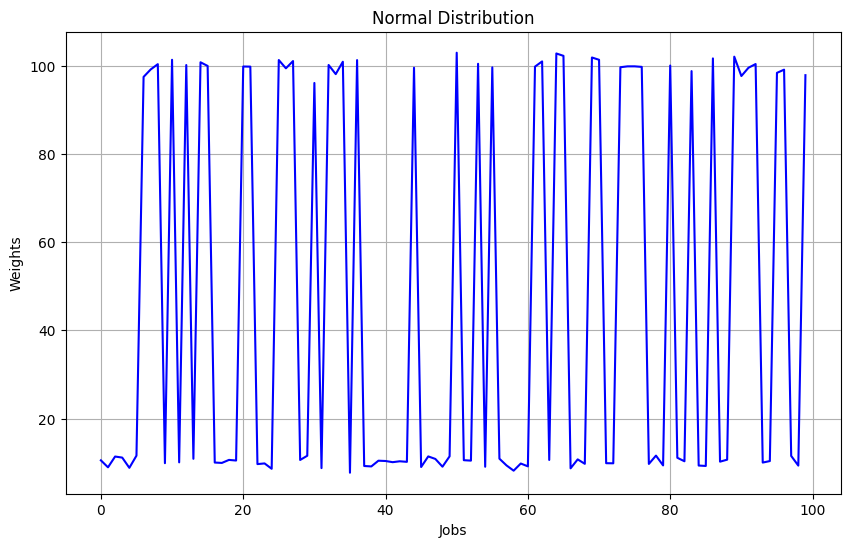

In [ ]:
#We test normal and weibull distribution
n = 100
shape = 1
scale = 50
gen = Generator()
jobs = gen.generateWeibull(shape,scale,n)
jobs = gen.generateNormal(shape,n,sum=True)
gen.plotDistribution()

### Machines and jobs size and generation

In [ ]:
n = 100
m = 30
jobs = gen.generateWeibull(shape,scale,n)

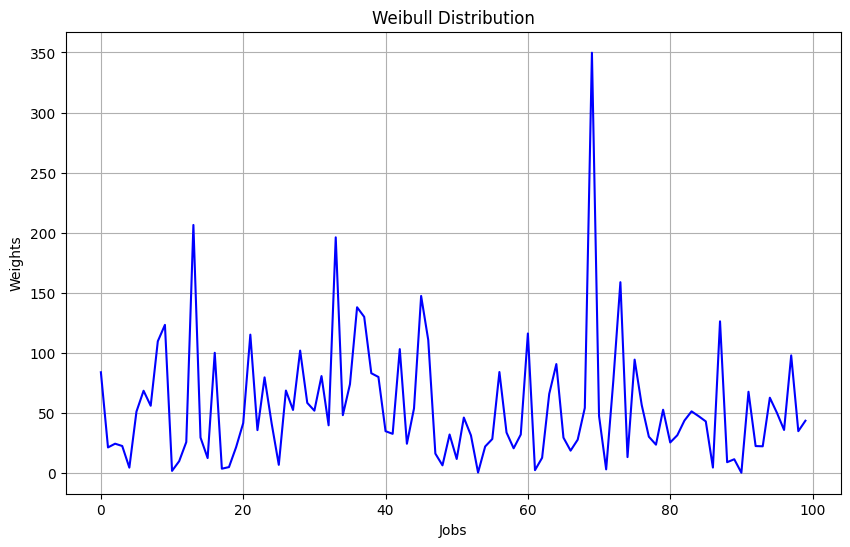

In [ ]:
gen.plotDistribution()

1


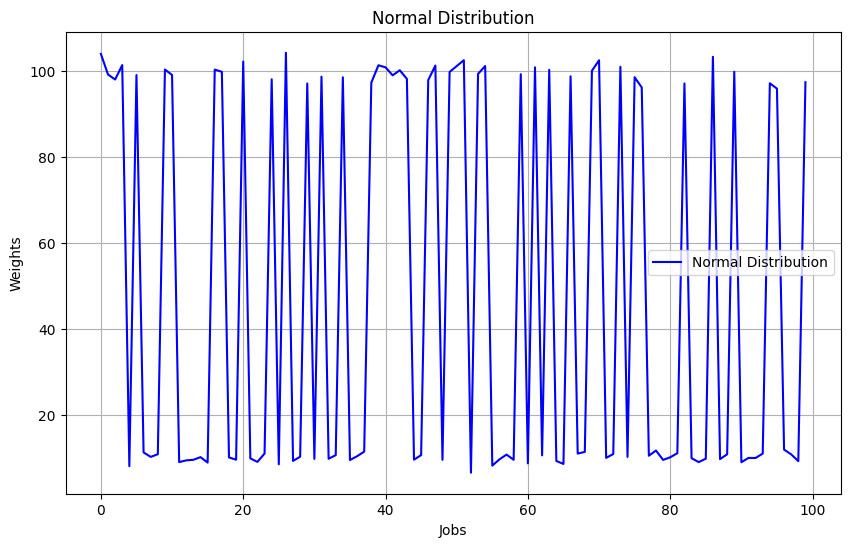

In [ ]:
jobs = gen.generateNormal(shape,n,sum=True)
gen.plotDistribution()

### IP Test

#### D. Weibull

In [ ]:
machines_ip = generateMachines(m)

# model = Model(machines=machines_ip,jobs=jobs)
model = JobSchedulingModel(machines=machines_ip,jobs=jobs)
model.run()
opt = model.getOpt()
model.getSolution()

,id_maquina,tarea,peso
0,0,3,11.577588
1,0,9,9.940324
2,0,16,10.465519
3,0,17,10.437431
4,0,19,10.131705
...,...,...,...
95,28,59,99.290634
96,28,69,9.843799
97,28,72,99.480903
98,29,81,98.925561


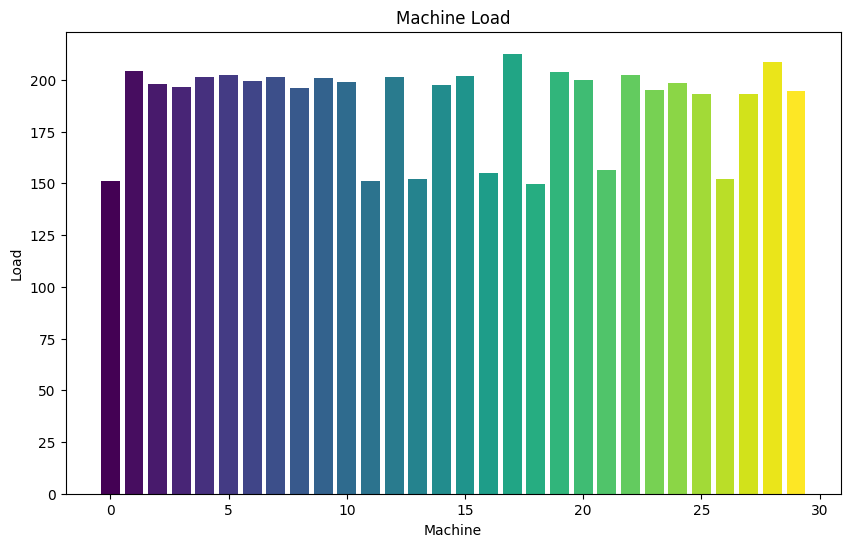

In [ ]:
plotResults(parser(machines_ip))

In [ ]:
opt

149.62984

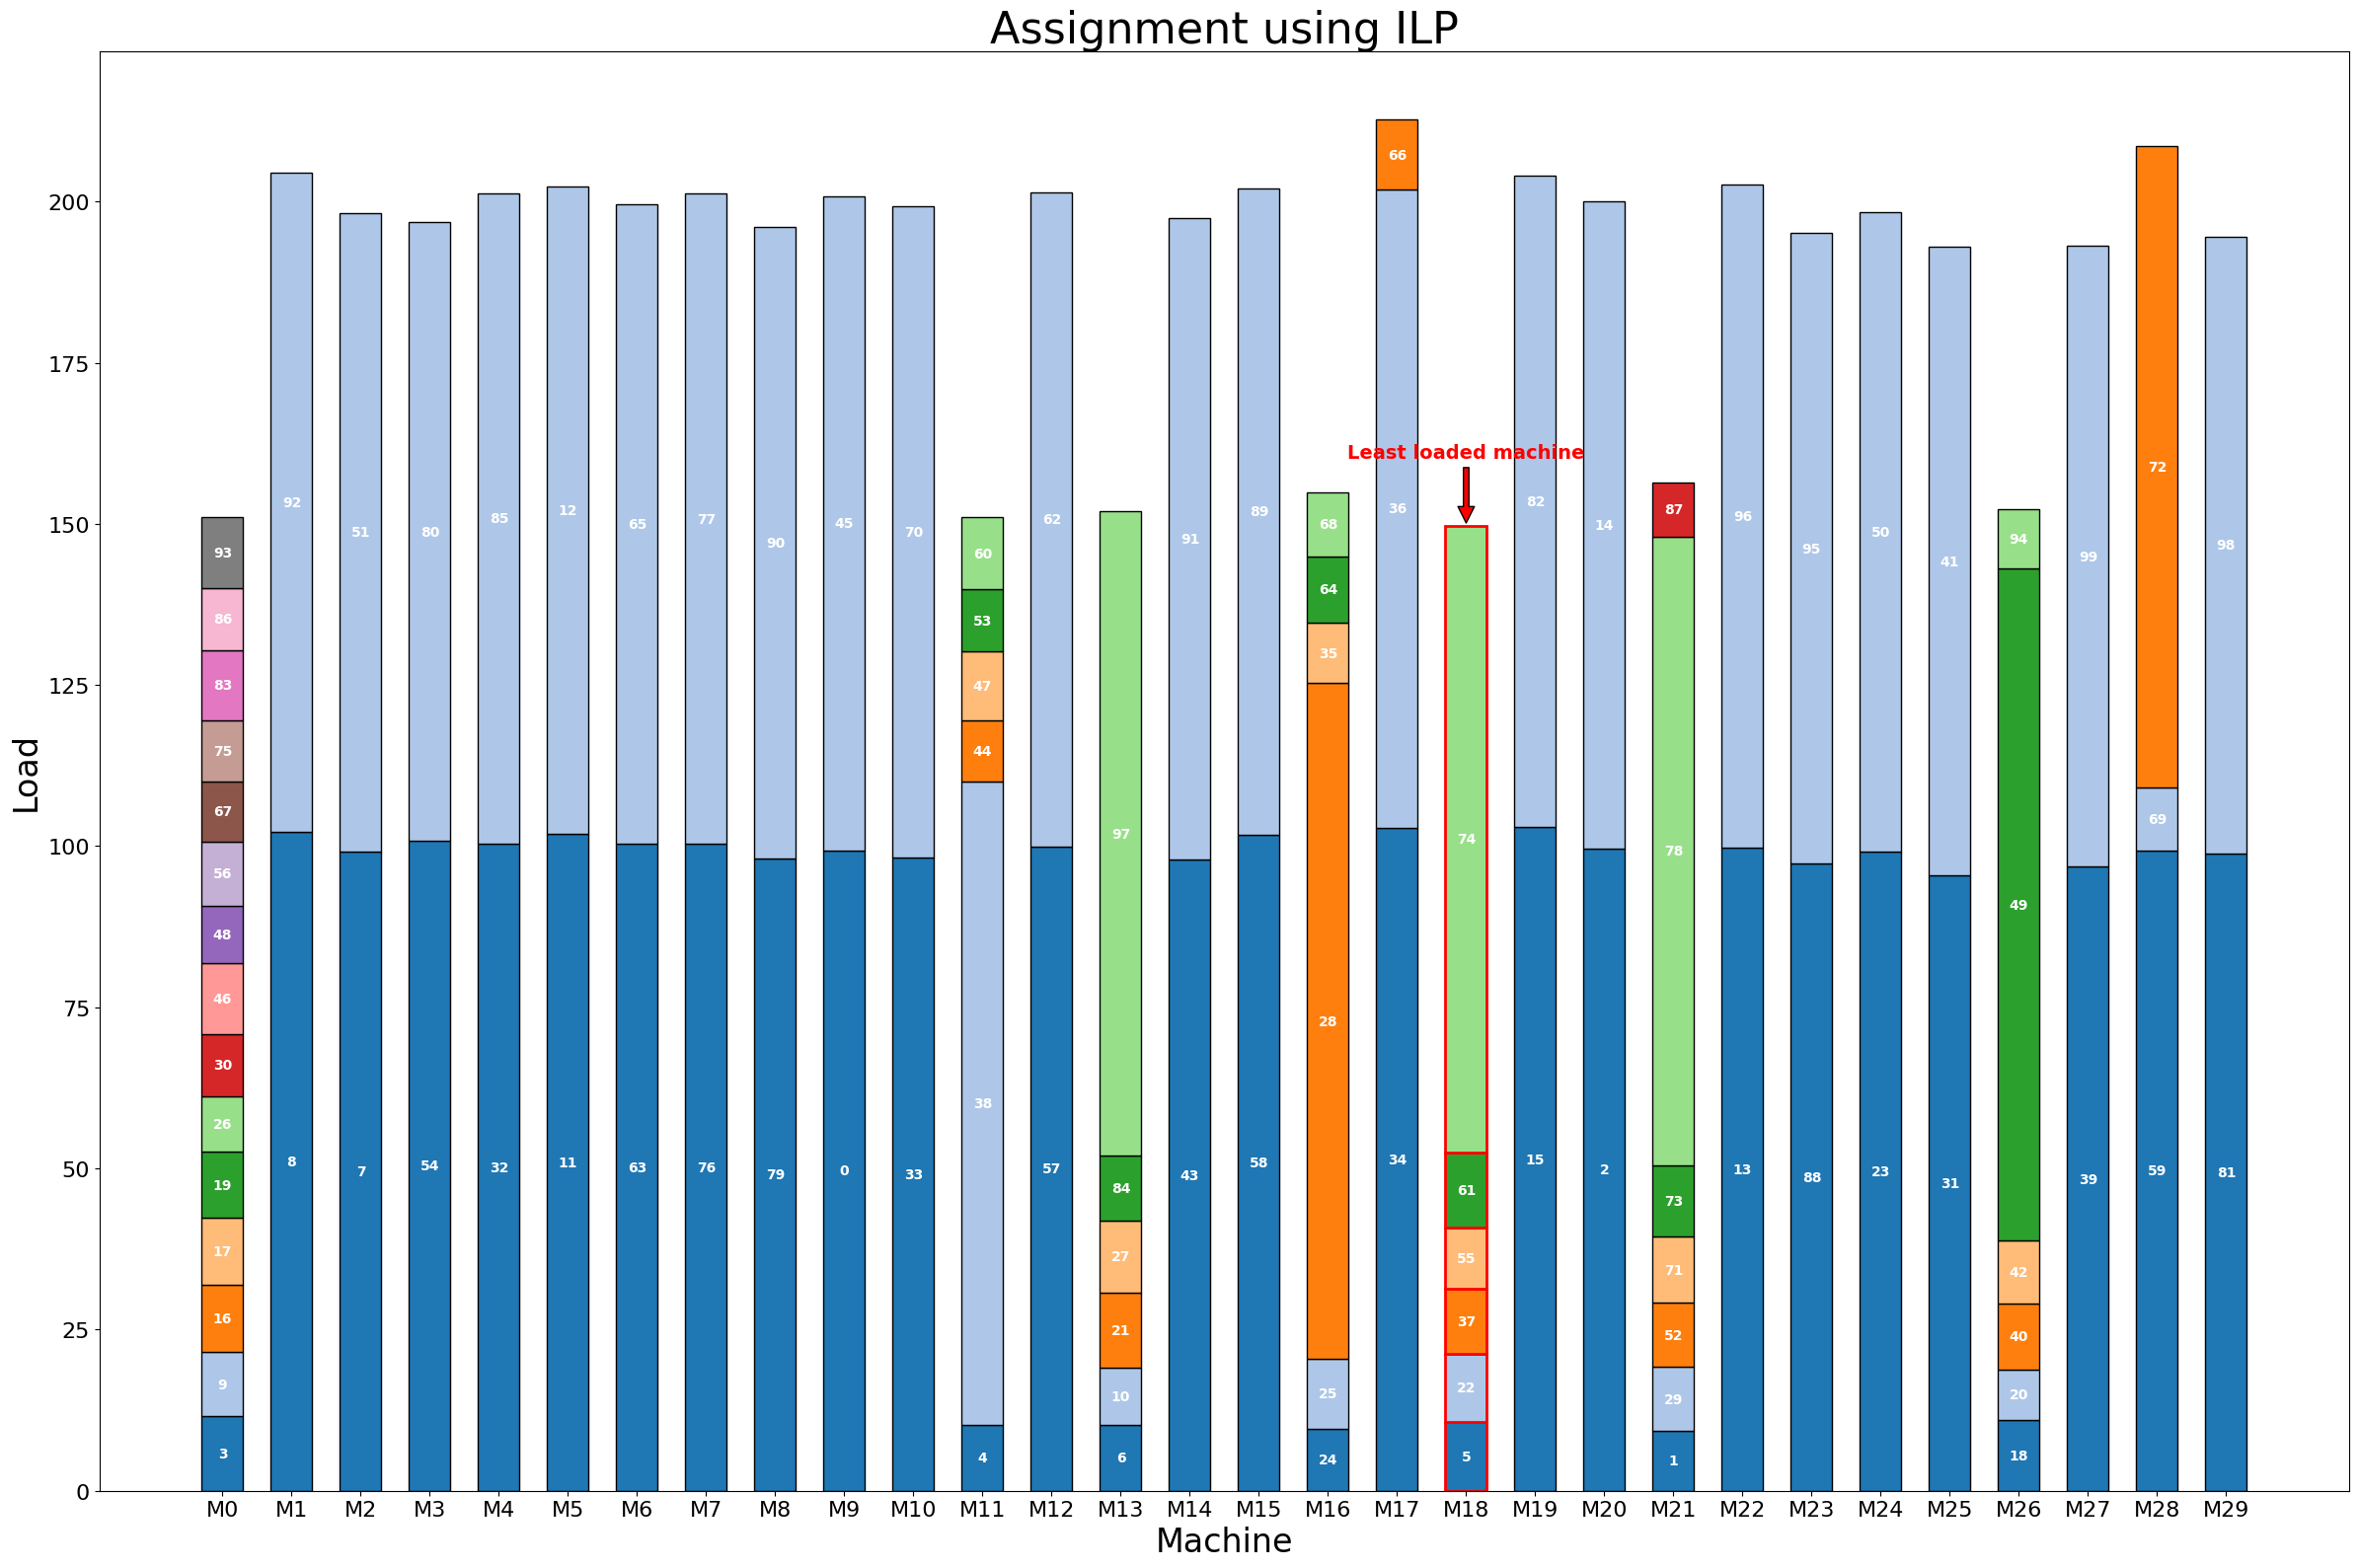

In [ ]:
values = [machine.getDict() for machine in machines_ip.values()]
plotear(values, "ILP")

#### D. Normal

In [ ]:
machines_ip = generateMachines(m)

# model = Model(machines=machines_ip,jobs=jobs)
model = JobSchedulingModel(machines=machines_ip,jobs=jobs_normal)
model.run()
opt_normal = model.getOpt()
model.getSolution()

NameError: name 'jobs_normal' is not defined

In [ ]:
print(opt_normal)

In [ ]:
values = [machine.getDict() for machine in machines_ip.values()]
plotear(values)

In [ ]:
opt_normal

### Greedy Test

#### D. Weibull

In [ ]:
machines_grd = generateMachines(m)
alg = GreedyAlgorithm(machines_grd,jobs)
alg.run()

In [ ]:
alg.getOpt()

264.9506151110309

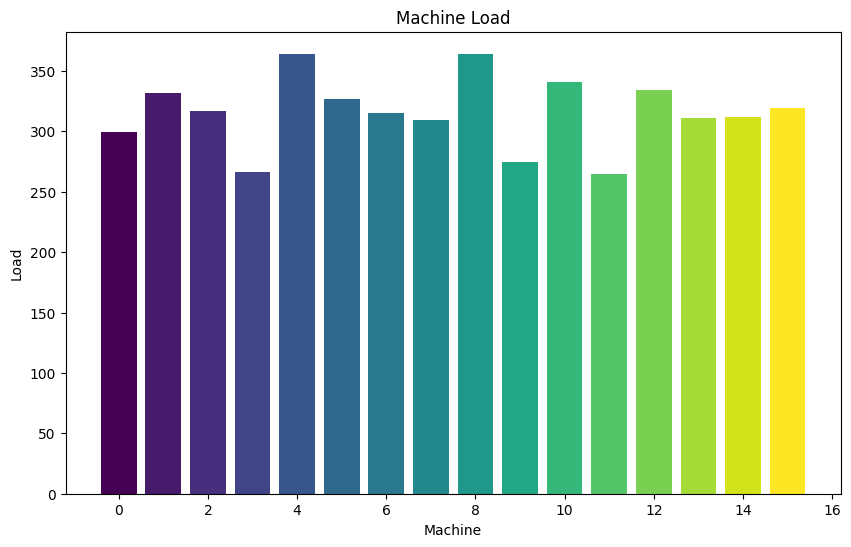

In [ ]:
plotResults(parser(machines_grd))

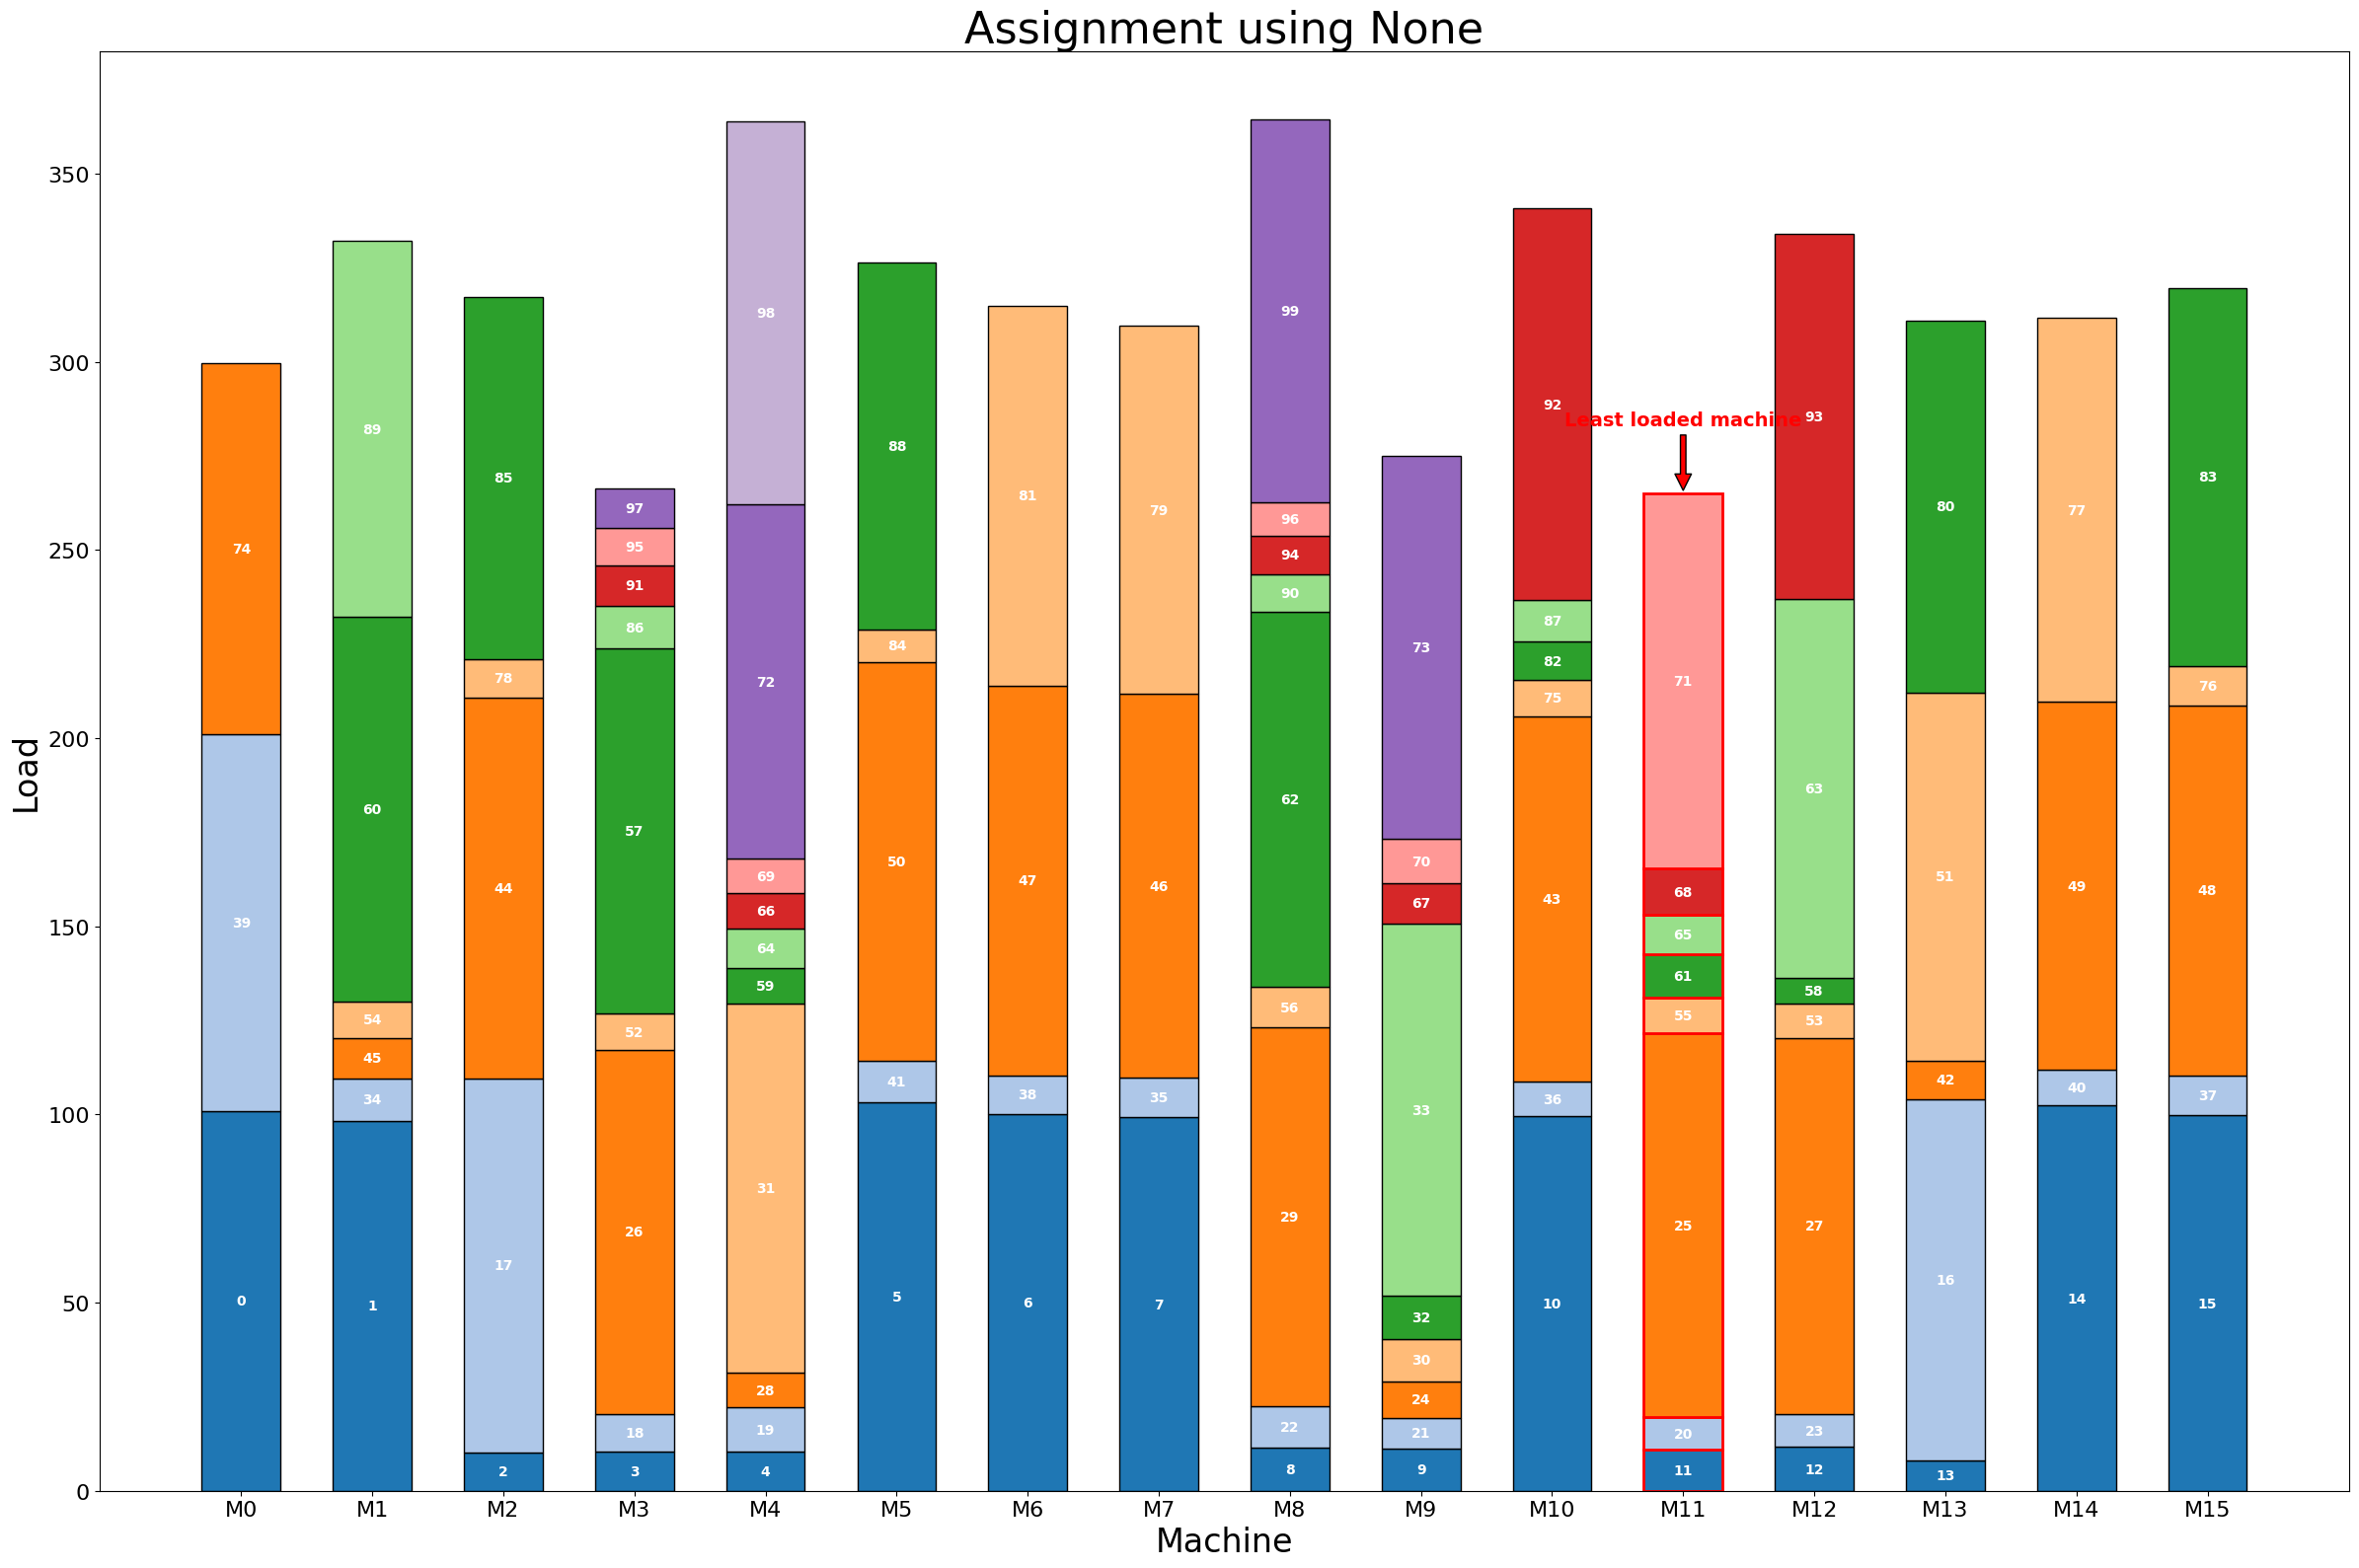

In [ ]:
values = [machine.getDict() for machine in machines_grd.values()]
plotear(values)

#### D. Normal

In [ ]:
print(jobs_normal)

{0: {'weight': 9.879759456072403}, 1: {'weight': 10.26638712681671}, 2: {'weight': 98.62707167975998}, 3: {'weight': 98.82934324644258}, 4: {'weight': 10.42669238447073}, 5: {'weight': 9.611321040962371}, 6: {'weight': 99.96748434842591}, 7: {'weight': 101.3081580477801}, 8: {'weight': 9.620708746367448}, 9: {'weight': 7.738494772377534}, 10: {'weight': 9.684630272230798}, 11: {'weight': 12.28695952808417}, 12: {'weight': 98.58596188919043}, 13: {'weight': 101.555423971701}, 14: {'weight': 9.340905134336255}, 15: {'weight': 103.1905975338616}, 16: {'weight': 98.8417055809837}, 17: {'weight': 9.272211326262141}, 18: {'weight': 103.46585064380169}, 19: {'weight': 9.368272844504572}, 20: {'weight': 99.31978124278751}, 21: {'weight': 99.71463700882587}, 22: {'weight': 101.77656136867087}, 23: {'weight': 99.2696055148637}, 24: {'weight': 97.89908887838766}, 25: {'weight': 100.80229894523707}, 26: {'weight': 96.74419992901933}, 27: {'weight': 100.84443379356937}, 28: {'weight': 100.266421487

In [ ]:
machines_grd = generateMachines(m)
alg = GreedyAlgorithm(machines_grd,jobs_normal)
alg.run()

In [ ]:
for i in machines_grd:
  print(machines_grd[i].getDict())

{0: 9.879759456072403, 21: 99.71463700882587, 38: 9.378018715503085, 45: 100.5008196896044, 70: 100.0122949364206, 96: 101.69783249279035}
{1: 10.26638712681671, 22: 101.77656136867087, 42: 100.95692888148147, 66: 9.698804336978519, 74: 105.97103038357089}
{2: 98.62707167975998, 28: 100.26642148768414, 54: 10.453653113835266, 61: 98.41803021127146, 89: 99.27071956126618}
{3: 98.82934324644258, 29: 9.96239460794908, 36: 99.92347926549537, 60: 10.264993396831814, 69: 99.66026728931254, 94: 100.97927788452482}
{4: 10.42669238447073, 23: 99.2696055148637, 39: 98.48494425505598, 59: 10.411539691894868, 68: 100.59521139582553, 95: 9.60180649656819}
{5: 9.611321040962371, 18: 103.46585064380169, 43: 10.10313569503457, 49: 99.54602474504998, 75: 99.69565353604956, 99: 10.135072868607619}
{6: 99.96748434842591, 30: 8.056931110394512, 35: 103.28325848529192, 63: 10.530585629243339, 73: 7.583797111503166, 77: 7.773133538730391, 78: 10.778053270937574, 79: 10.778981282945852, 80: 11.60158332655812

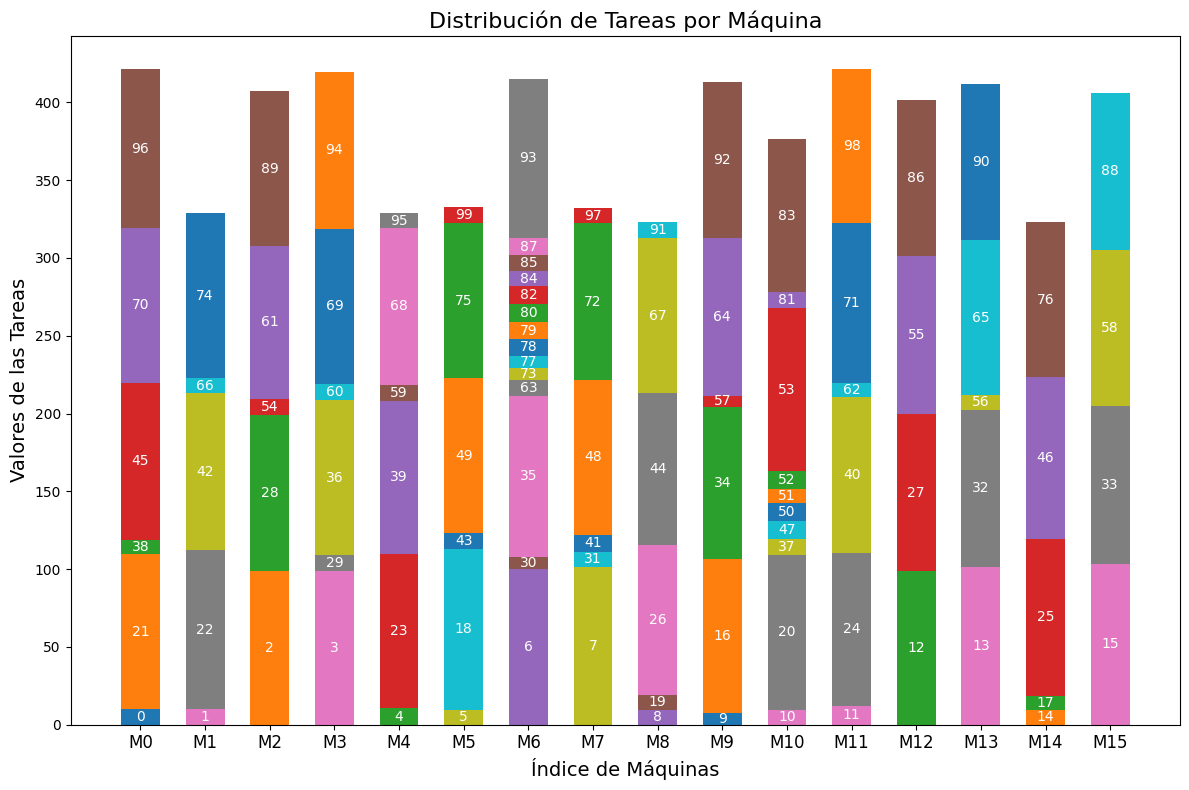

In [ ]:
values = [machine.getDict() for machine in machines_grd.values()]
plotear(values)

In [ ]:
alg.getOpt()

322.8457865574614

### Azar test

#### D. Weibull

In [ ]:
print(prom_opt(4*m, alg_type="azar",jobs=jobs))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asi

In [ ]:
machines_rnd = generateMachines(m)
alg = RandomizedAlgorithm(machines_rnd,jobs)
alg.run()


Se truncaron las últimas líneas 5000 del resultado de transmisión.
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asi

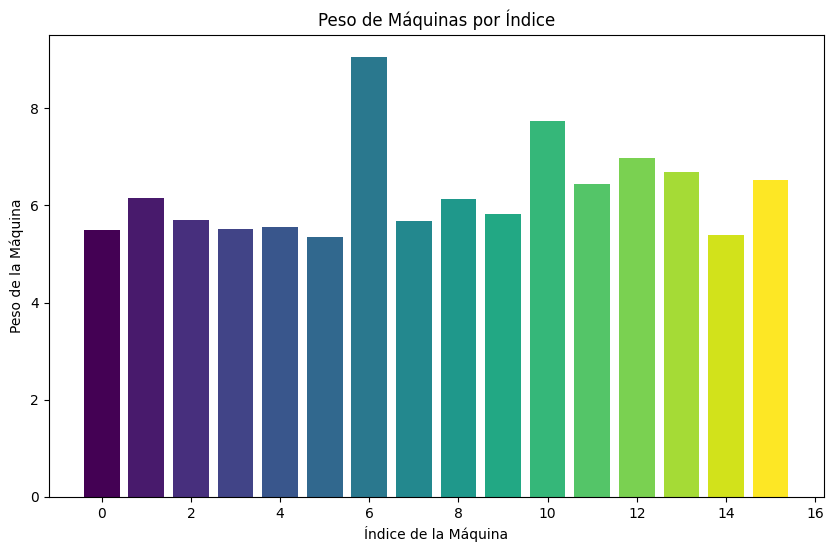

In [ ]:
plotResults(parser(machines_rnd))

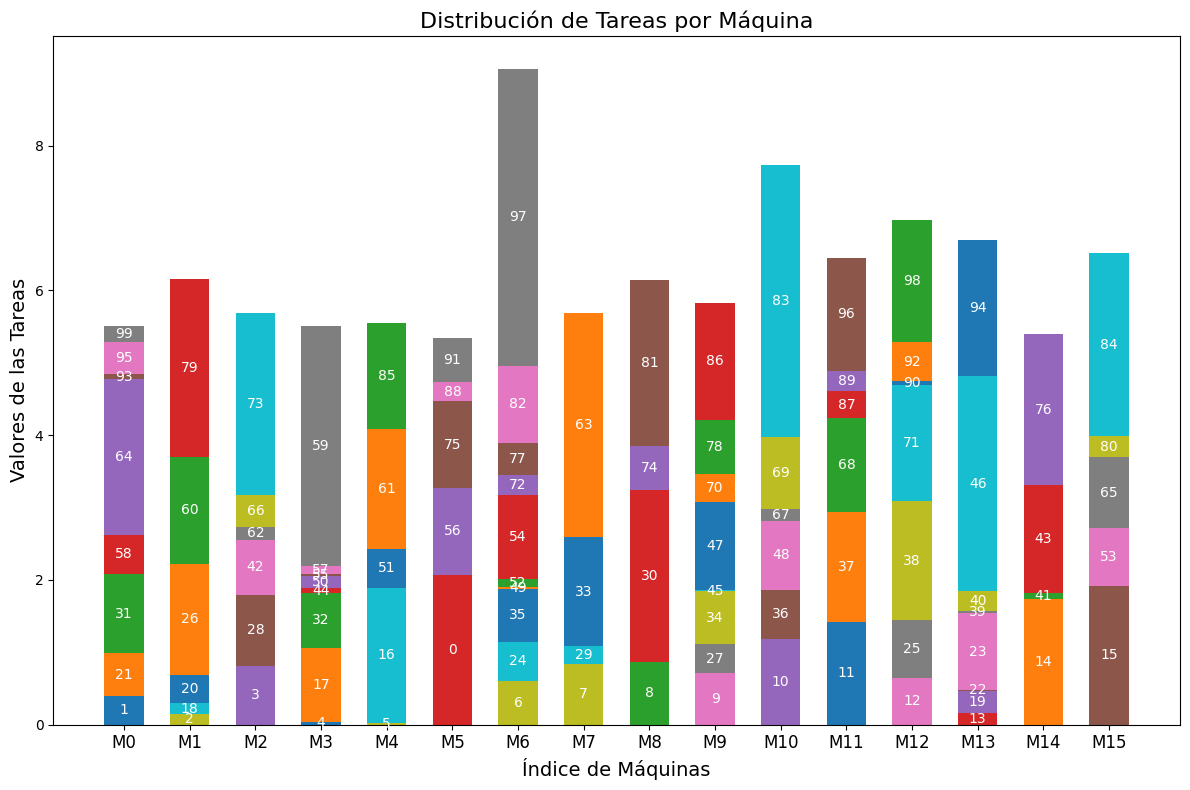

In [ ]:
values = [machine.getDict() for machine in machines_rnd.values()]
plotear(values)

#### D. Normal

In [ ]:
machines_rnd = generateMachines(m)
alg = RandomizedAlgorithm(machines_rnd,jobs_normal)
alg.run()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Asignando a las maquinas pequenas
99.2696055148637
Asignando a las maquinas pequenas
99.2696055148637
99.2696055148637
Asignando a las maquinas pequenas
99.2696055148637
99.2696055148637
99.2696055148637
Asignando a las maquinas pequenas
99.2696055148637
Asignando a las maquinas pequenas
99.2696055148637
Asignando a las maquinas pequenas
99.2696055148637
99.2696055148637
99.2696055148637
Asignando a las maquinas pequenas
99.2696055148637
99.2696055148637
99.2696055148637
Asignando a las maquinas pequenas
99.2696055148637
Asignando a las maquinas pequenas
99.2696055148637
Asignando a las maquinas pequenas
99.2696055148637
99.2696055148637
Asignando a las maquinas pequenas
99.2696055148637
99.2696055148637
Asignando a las maquinas pequenas
99.2696055148637
Asignando a las maquinas pequenas
99.2696055148637
99.2696055148637
99.2696055148637
Asignando a las maquinas pequenas
99.2696055148637
99.2696055148637
99.2696055148637
Asignando a las m

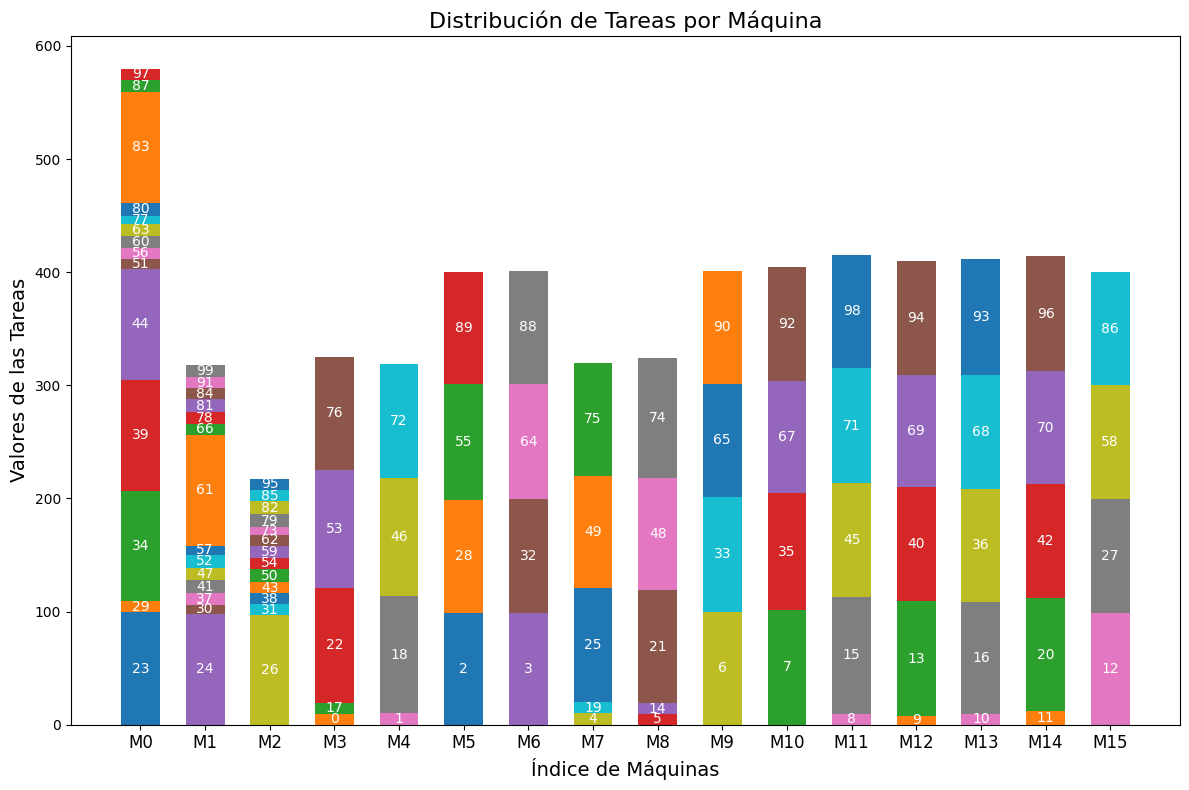

In [ ]:
values = [machine.getDict() for machine in machines_rnd.values()]
plotear(values)

In [ ]:
print(alg.getOpt())

217.3531914044773


### Known opt value Test

In [ ]:
# opt = model.getOpt()
machines_opt = generateMachines(m)
alg = OptAlgorithm(machines_opt,jobs)
alg.run(opt, 1)

In [ ]:
[print(i.getDict()) for i in machines_opt.values()]

{0: 100.92312294769735, 1: 98.36762096253605, 76: 10.577084545348596, 80: 98.71974258295964}
{2: 10.255772429717942, 3: 10.365589698313693, 4: 10.453149340250397, 5: 103.29788553537978, 6: 100.18274731402141, 90: 9.983327776841934, 94: 10.067043563922343, 96: 8.907858407012878, 99: 101.68624568990738}
{7: 99.22582527301387, 8: 11.551098385354665, 9: 11.19466271039755, 10: 99.44135493554504, 84: 8.510688021787923, 88: 97.59218659502262}
{11: 10.894500734242293, 12: 11.624498454717356, 13: 8.14399696484214, 14: 102.37625677407684, 15: 99.71414339058937, 89: 99.92671107207575}
{16: 95.97717630221577, 17: 99.1785836982407, 74: 98.55802953131189}
{18: 10.091590573720348, 19: 11.646108192262025, 20: 8.734037483025102, 21: 8.190308079993933, 22: 10.830996146361821, 23: 8.846686191302476, 24: 9.741479981987872, 25: 101.84010177252273, 72: 94.26555399488109}
{26: 96.69297659596809, 27: 99.87726453624738, 75: 9.783728146147414, 79: 97.74596582819612}
{28: 9.404647986793238, 29: 100.6725063959386

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

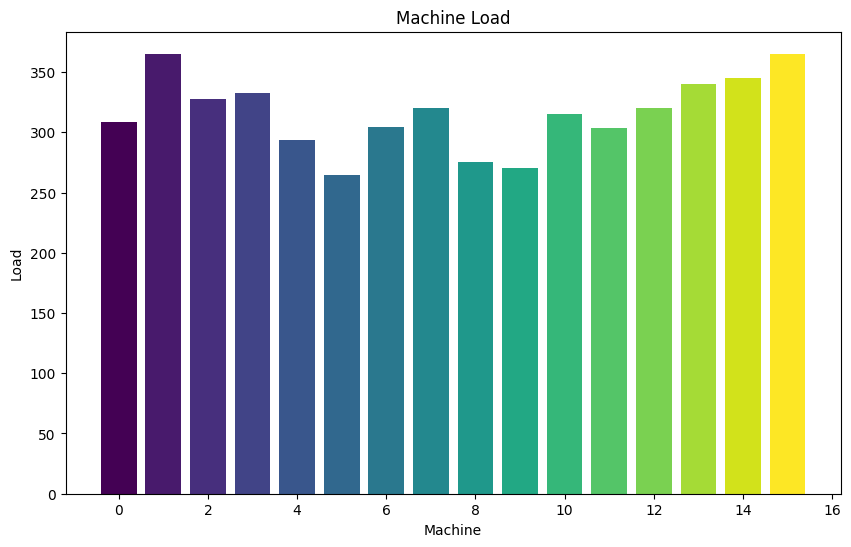

In [ ]:
plotResults(parser(machines_opt))

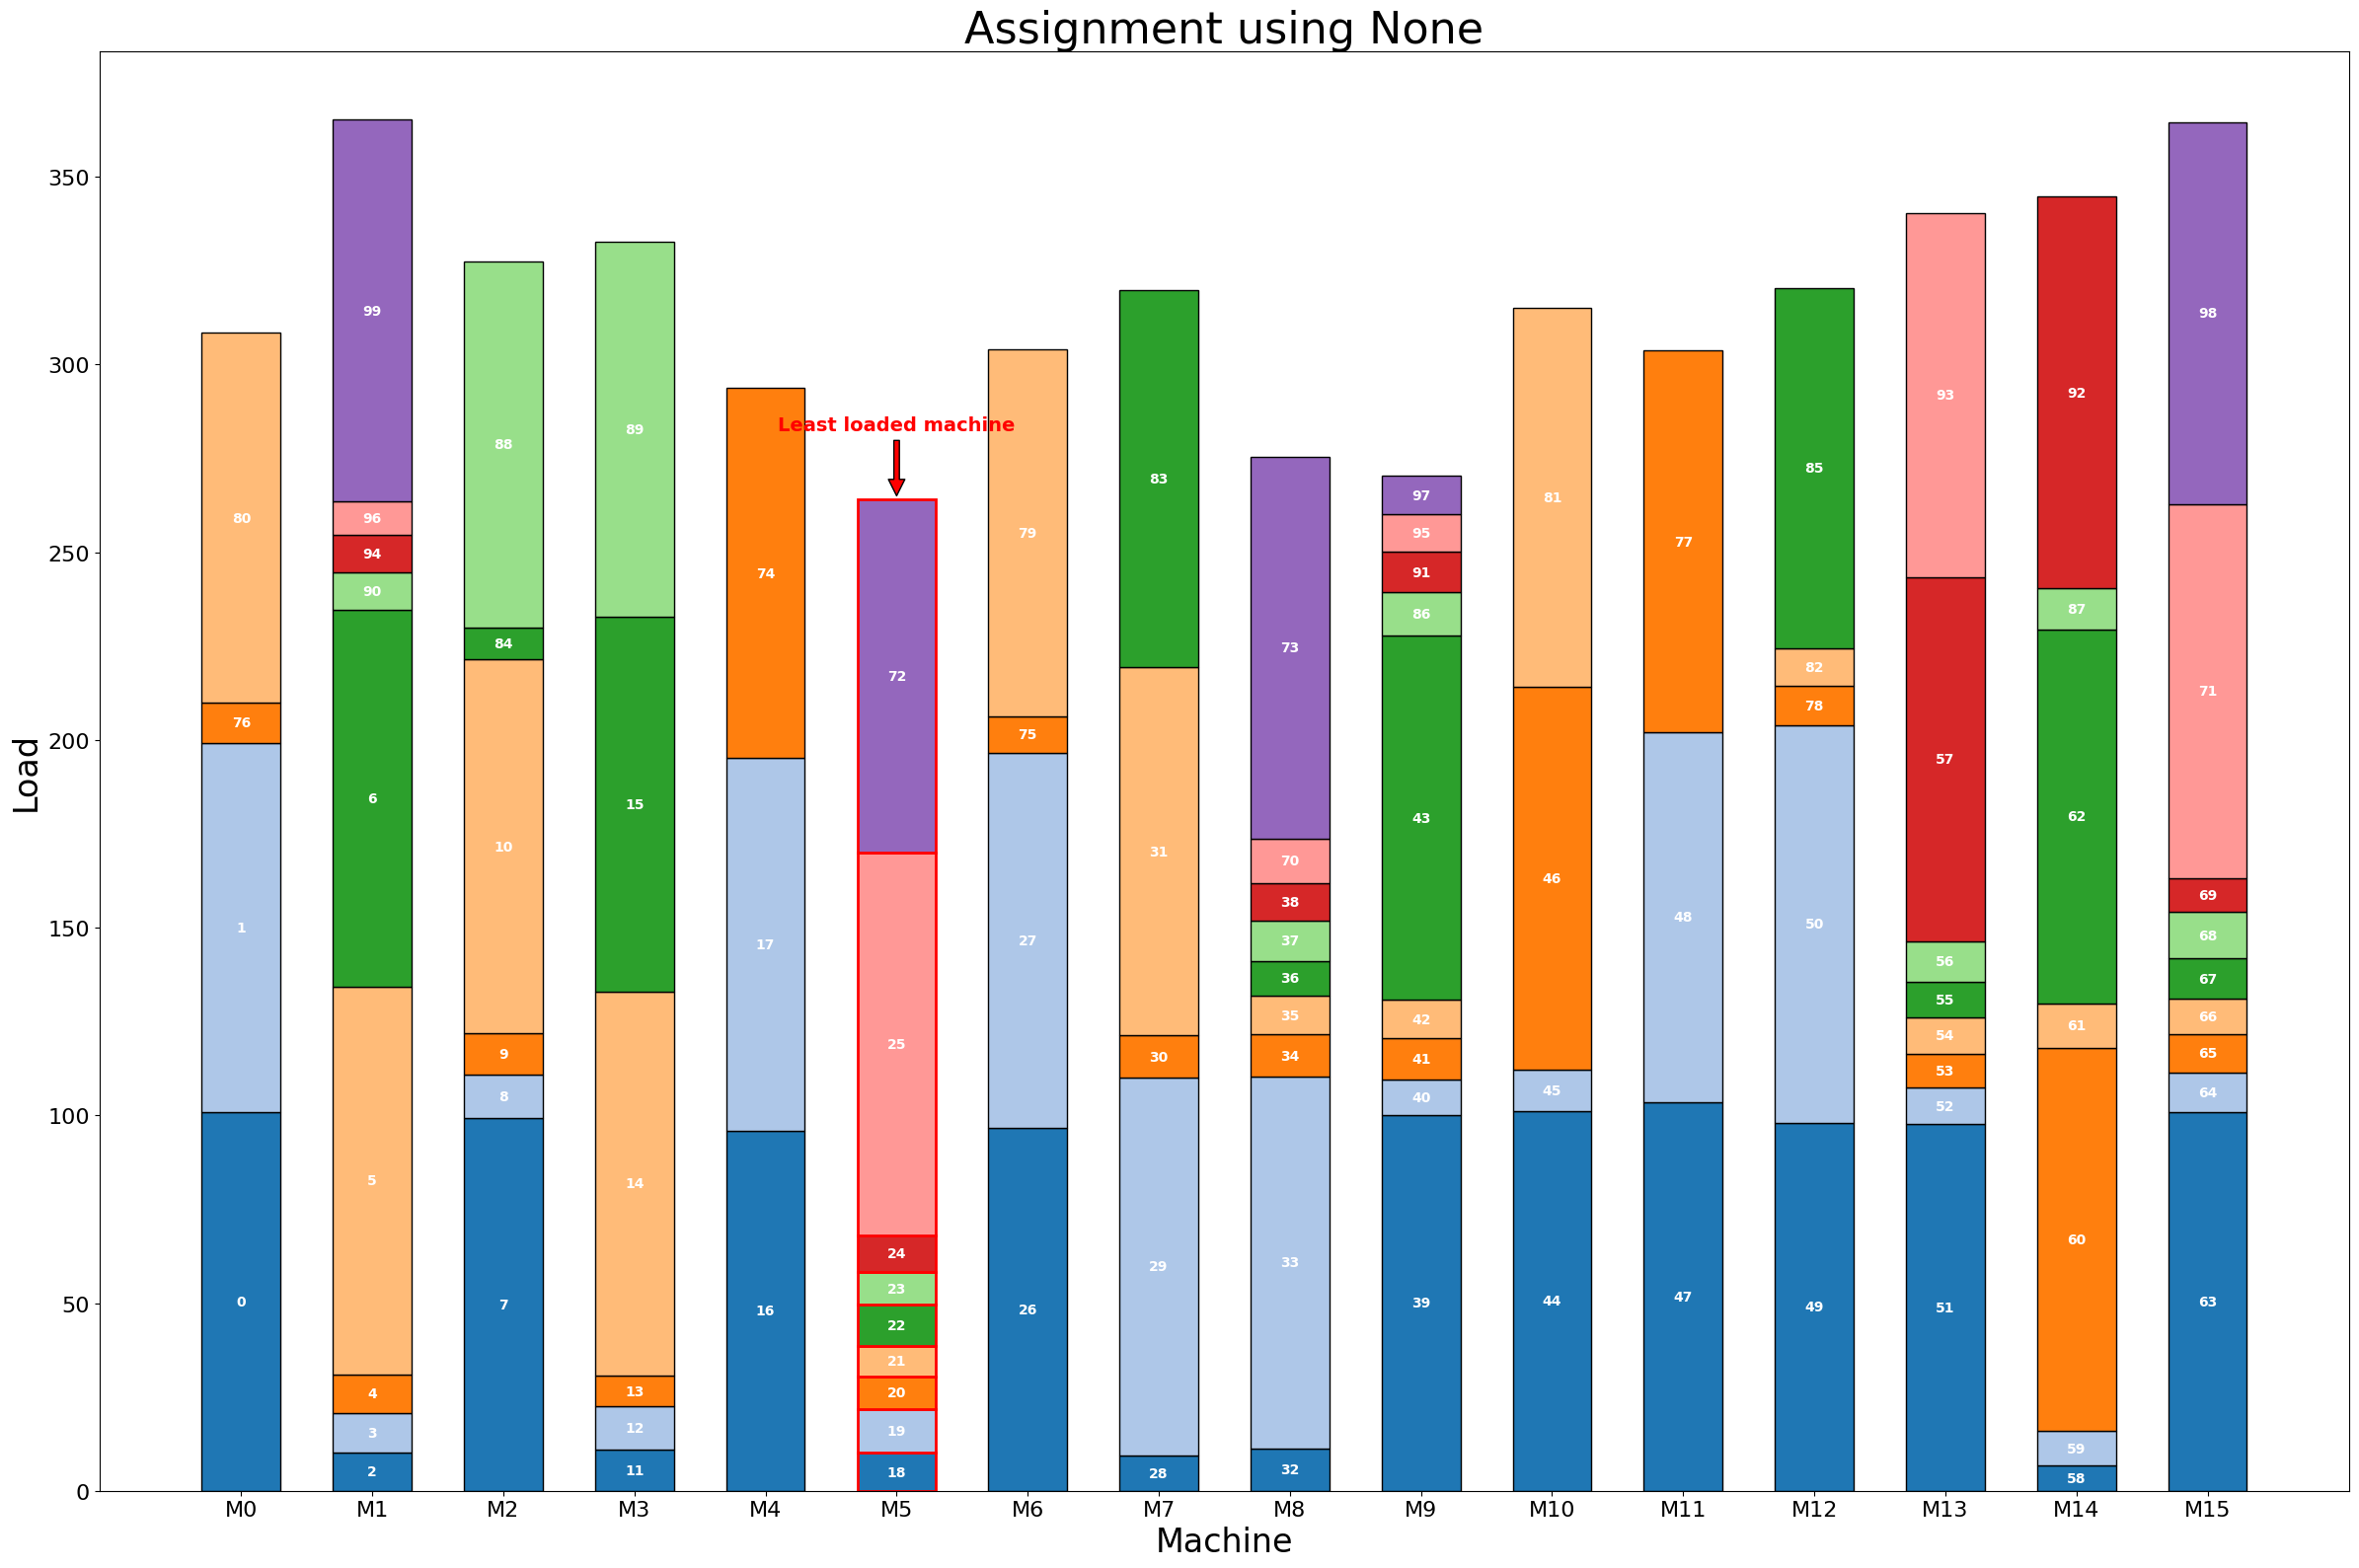

In [ ]:
values = [machine.getDict() for machine in machines_opt.values()]
plotear(values)

In [ ]:
alg.getOpt()

264.18686241605735

In [ ]:
# opt = model.getOpt()
machines_opt = generateMachines(m)
alg = OptAlgorithm(machines_opt,jobs_normal)
alg.run(opt, 1)

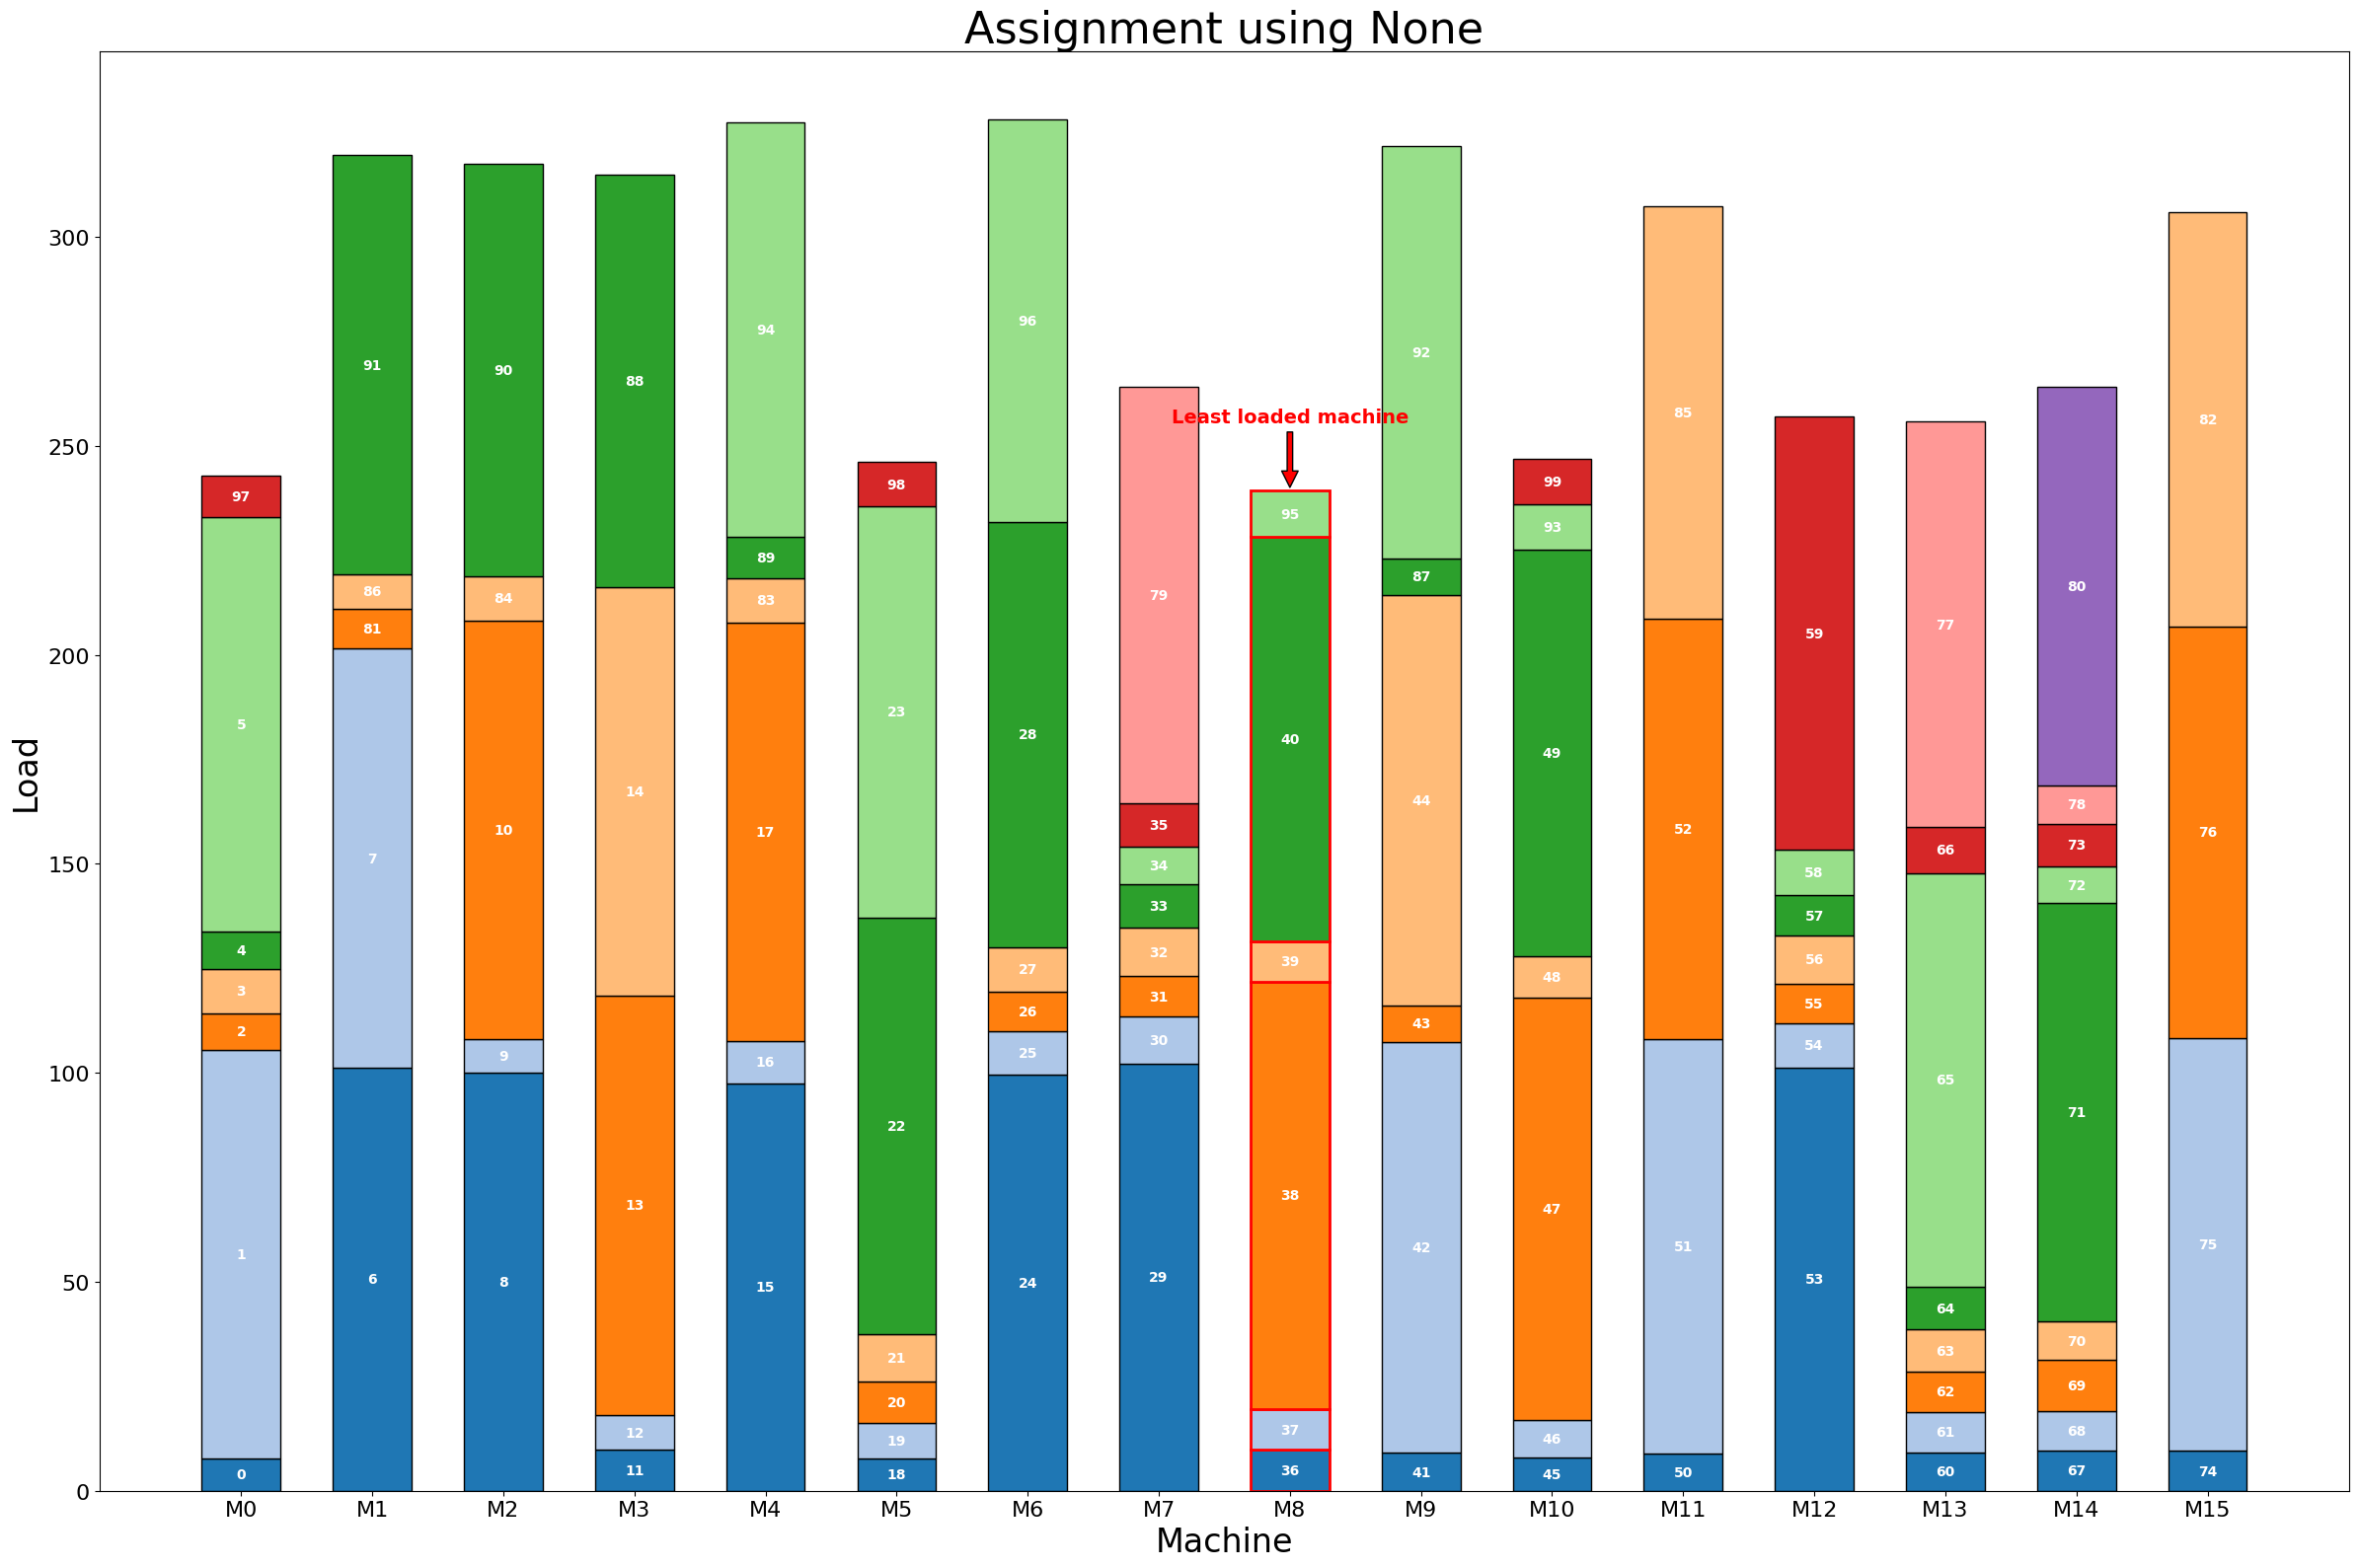

In [ ]:
values = [machine.getDict() for machine in machines_opt.values()]
plotear(values)

In [ ]:
alg.getOpt()

291.14070923590697

### Own algorithm test

In [ ]:
machines_second = generateMachines(m)
alg = MergedAlgorithmn(machines_second, jobs, opt, ro = )
alg.run()

correremos fill con ro/10


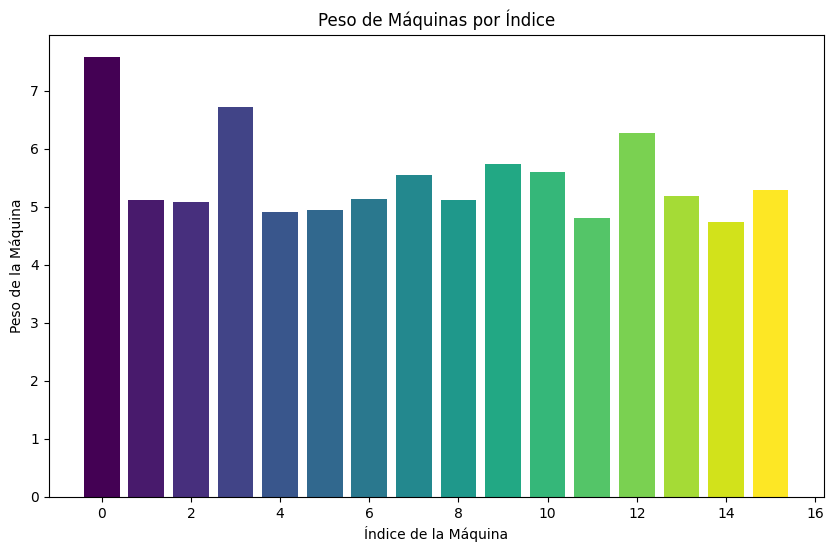

In [ ]:
plotResults(parser(machines_second))

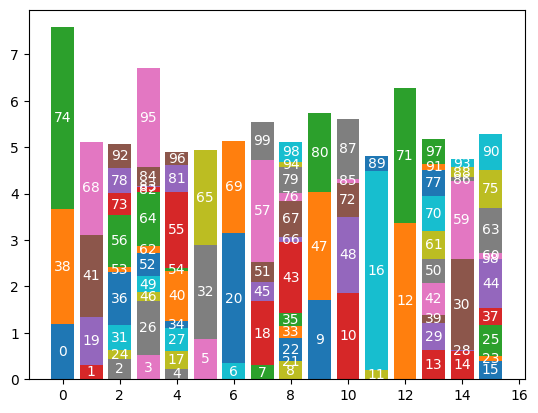

In [ ]:
values = [machine.getDict() for machine in machines_second.values()]
plotear(values)

In [ ]:
machines_second = generateMachines(m)
alg = SecondAlgorithm(machines_second, jobs_normal, opt, ro = 3)
alg.run()

Corriendo algoritmo de Azar
0
0
Asignando a las maquinas pequenas
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
Asignando a las maquinas pequenas
9.676255612022842
9.676255612022842
9.676255612022842
Asignando a las maquinas pequenas
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
Asignando a las maquinas pequenas
9.676255612022842
9.676255612022842
Asignando a las maquinas pequenas
9.676255612022842
9.676255612022842
Asignando a las maquinas pequenas
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
Asignando a las maquinas pequenas
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
9.676255612022842
Asignando a las maquinas pequenas
9.6762556120

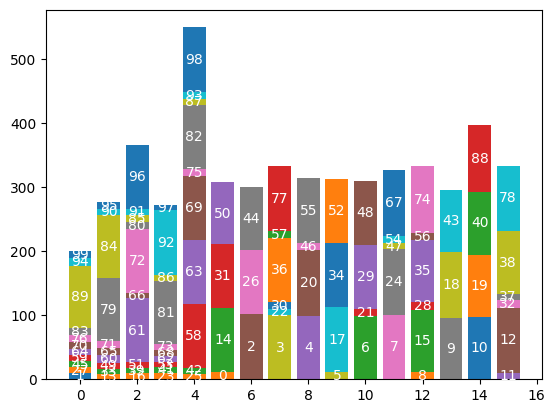

In [ ]:
values = [machine.getDict() for machine in machines_second.values()]
plotear(values)

In [ ]:
alg.getOpt()

199.38613304961012

In [ ]:
n_iters = 2*2*m
prom = prom_opt(n_iters)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Asignando a las maquinas pequenas
3.3714281884369153
Asignando a las maquinas pequenas
3.3714281884369153
Asignando a las maquinas pequenas
3.3714281884369153
Asignando a las maquinas pequenas
3.3714281884369153
Asignando a las maquinas pequenas
3.3714281884369153
Asignando a las maquinas pequenas
3.3714281884369153
Asignando a las maquinas pequenas
3.3714281884369153
Asignando a las maquinas pequenas
3.3714281884369153
Asignando a las maquinas pequenas
3.3714281884369153
Asignando a las maquinas pequenas
3.3714281884369153
Asignando a las maquinas pequenas
3.3714281884369153
Asignando a las maquinas pequenas
3.3714281884369153
Asignando a las maquinas pequenas
3.3714281884369153
Asignando a las maquinas pequenas
3.3714281884369153
Asignando a las maquinas pequenas
3.3714281884369153
Asignando a las maquinas pequenas
3.3714281884369153
Asignando a las maquinas pequenas
3.3714281884369153
correremos fill con ro
correremo

In [ ]:
prom

4.196963764440475

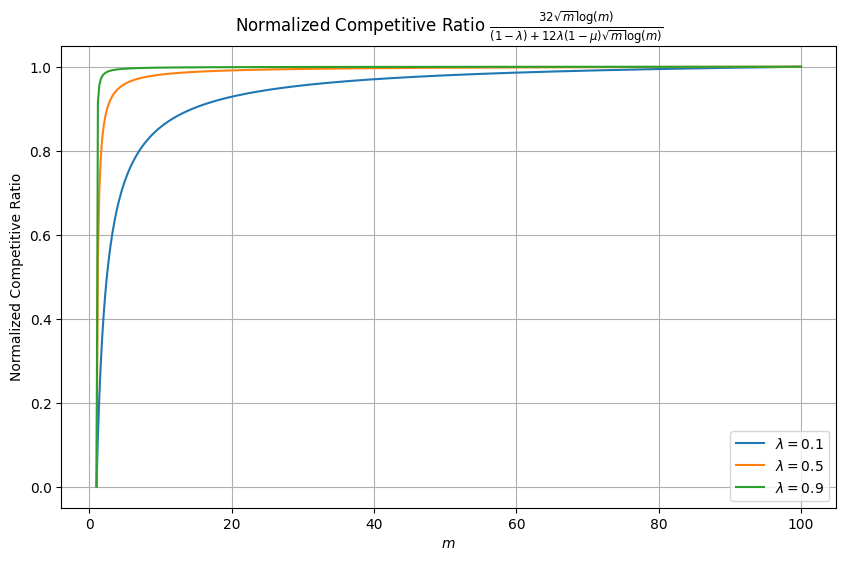

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the function
m_values = np.linspace(1, 100, 500)  # m values from 1 to 100
lambda_values = [0.1, 0.5, 0.9]  # Different lambda values for comparison
mu = 0.5  # Fixed mu value

# Define the function
def competitive_ratio(m, lambda_val, mu):
    numerator = 32 * np.sqrt(m) * np.log(m)
    denominator = (1 - lambda_val) + 12 * lambda_val * (1 - mu) * np.sqrt(m) * np.log(m)
    return numerator / denominator

# Create the plots
plt.figure(figsize=(10, 6))
for lambda_val in lambda_values:
    ratios = competitive_ratio(m_values, lambda_val, mu)

    # Normalize the competitive ratios by dividing by the maximum value
    normalized_ratios = ratios / np.max(ratios)

    plt.plot(m_values, normalized_ratios, label=f"$\lambda={lambda_val}$")

# Customize the plot
plt.title(r"Normalized Competitive Ratio $\frac{32\sqrt{m} \log(m)}{(1-\lambda) + 12\lambda(1-\mu) \sqrt{m} \log(m)}$")
plt.xlabel("$m$")
plt.ylabel("Normalized Competitive Ratio")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


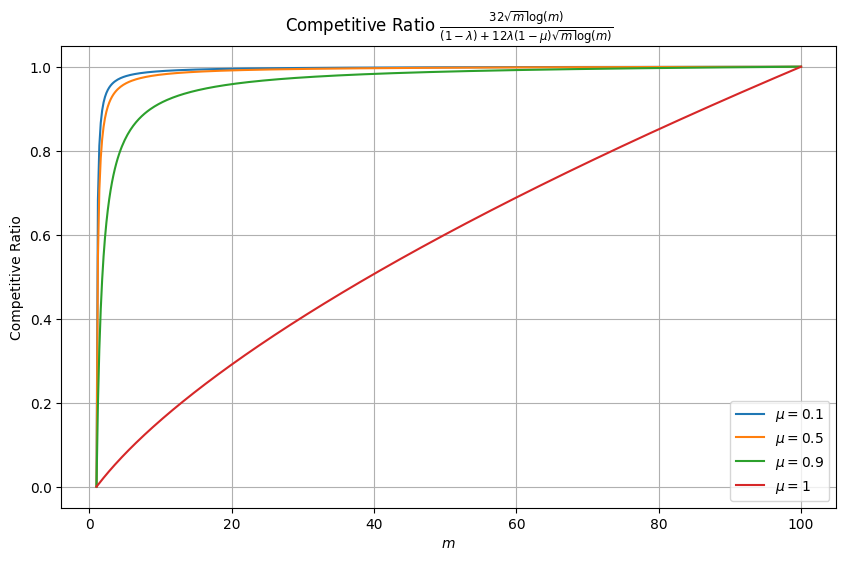

In [ ]:
# Define new mu values for comparison
mu_values = [0.1, 0.5, 0.9, 1]  # Different mu values
lambda_val = 0.5  # Fixed lambda value

# Create the plots
plt.figure(figsize=(10, 6))
for mu in mu_values:
    ratios = competitive_ratio(m_values, lambda_val, mu)
    plt.plot(m_values, ratios, label=f"$\mu={mu}$")

# Customize the plot
plt.title(r"Competitive Ratio $\frac{32\sqrt{m} \log(m)}{(1-\lambda) + 12\lambda(1-\mu) \sqrt{m} \log(m)}$")
plt.xlabel("$m$")
plt.ylabel("Competitive Ratio")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


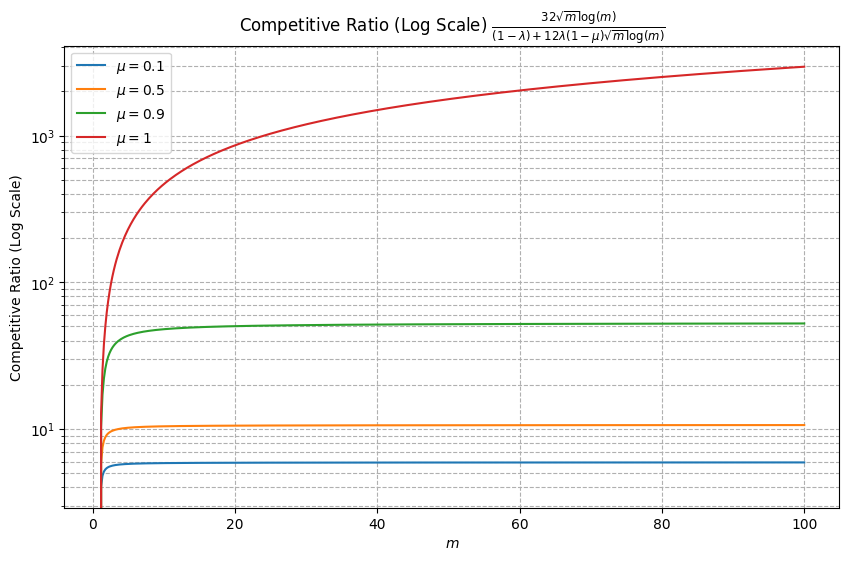

In [ ]:
# Apply logarithmic scale to y-axis
plt.figure(figsize=(10, 6))
for mu in mu_values:
    ratios = competitive_ratio(m_values, lambda_val, mu)
    plt.plot(m_values, ratios, label=f"$\mu={mu}$")

# Customize the plot
plt.yscale("log")  # Logarithmic scale for the y-axis
plt.title(r"Competitive Ratio (Log Scale) $\frac{32\sqrt{m} \log(m)}{(1-\lambda) + 12\lambda(1-\mu) \sqrt{m} \log(m)}$")
plt.xlabel("$m$")
plt.ylabel("Competitive Ratio (Log Scale)")
plt.legend()
plt.grid(True, which="both", linestyle="--")

# Show the plot
plt.show()


### Primer test con malas instancias

Primero las tareas grandes y luego pequeñas

In [ ]:
#Creacion de instancias malas
jobs_1 = {i : {'weight':100 if i<50 else random.randint(0,10)} for i in range(100)}

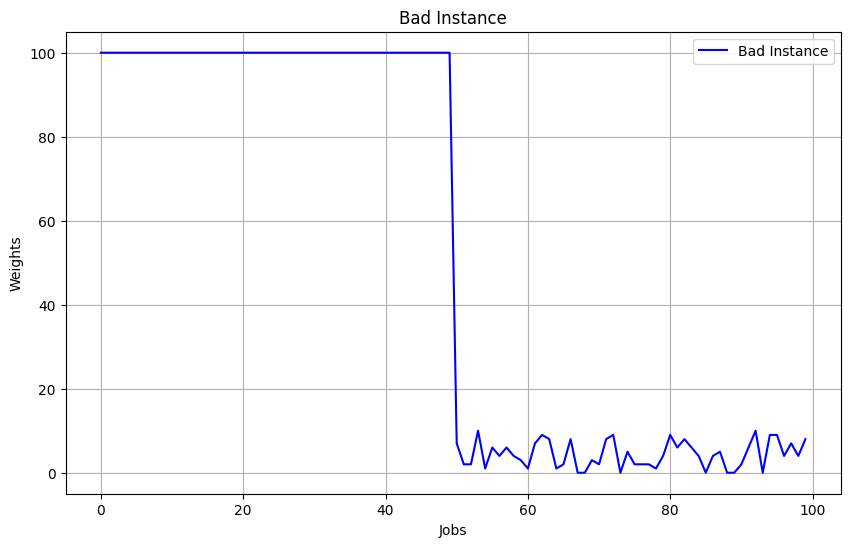

In [ ]:
gen = Generator()
gen.generateBad(n)
gen.plotDistribution()

In [ ]:
#IP
machines_ip = generateMachines(m)

# model = Model(machines=machines_ip,jobs=jobs)
model = JobSchedulingModel(machines=machines_ip,jobs=jobs_1)
model.run()
opt = model.getOpt()
model.getSolution()

,id_maquina,tarea,peso
0,0,44,100
1,0,57,2
2,0,58,4
3,0,59,1
4,0,60,3
...,...,...,...
95,27,74,0
96,28,34,100
97,28,49,100
98,29,27,100


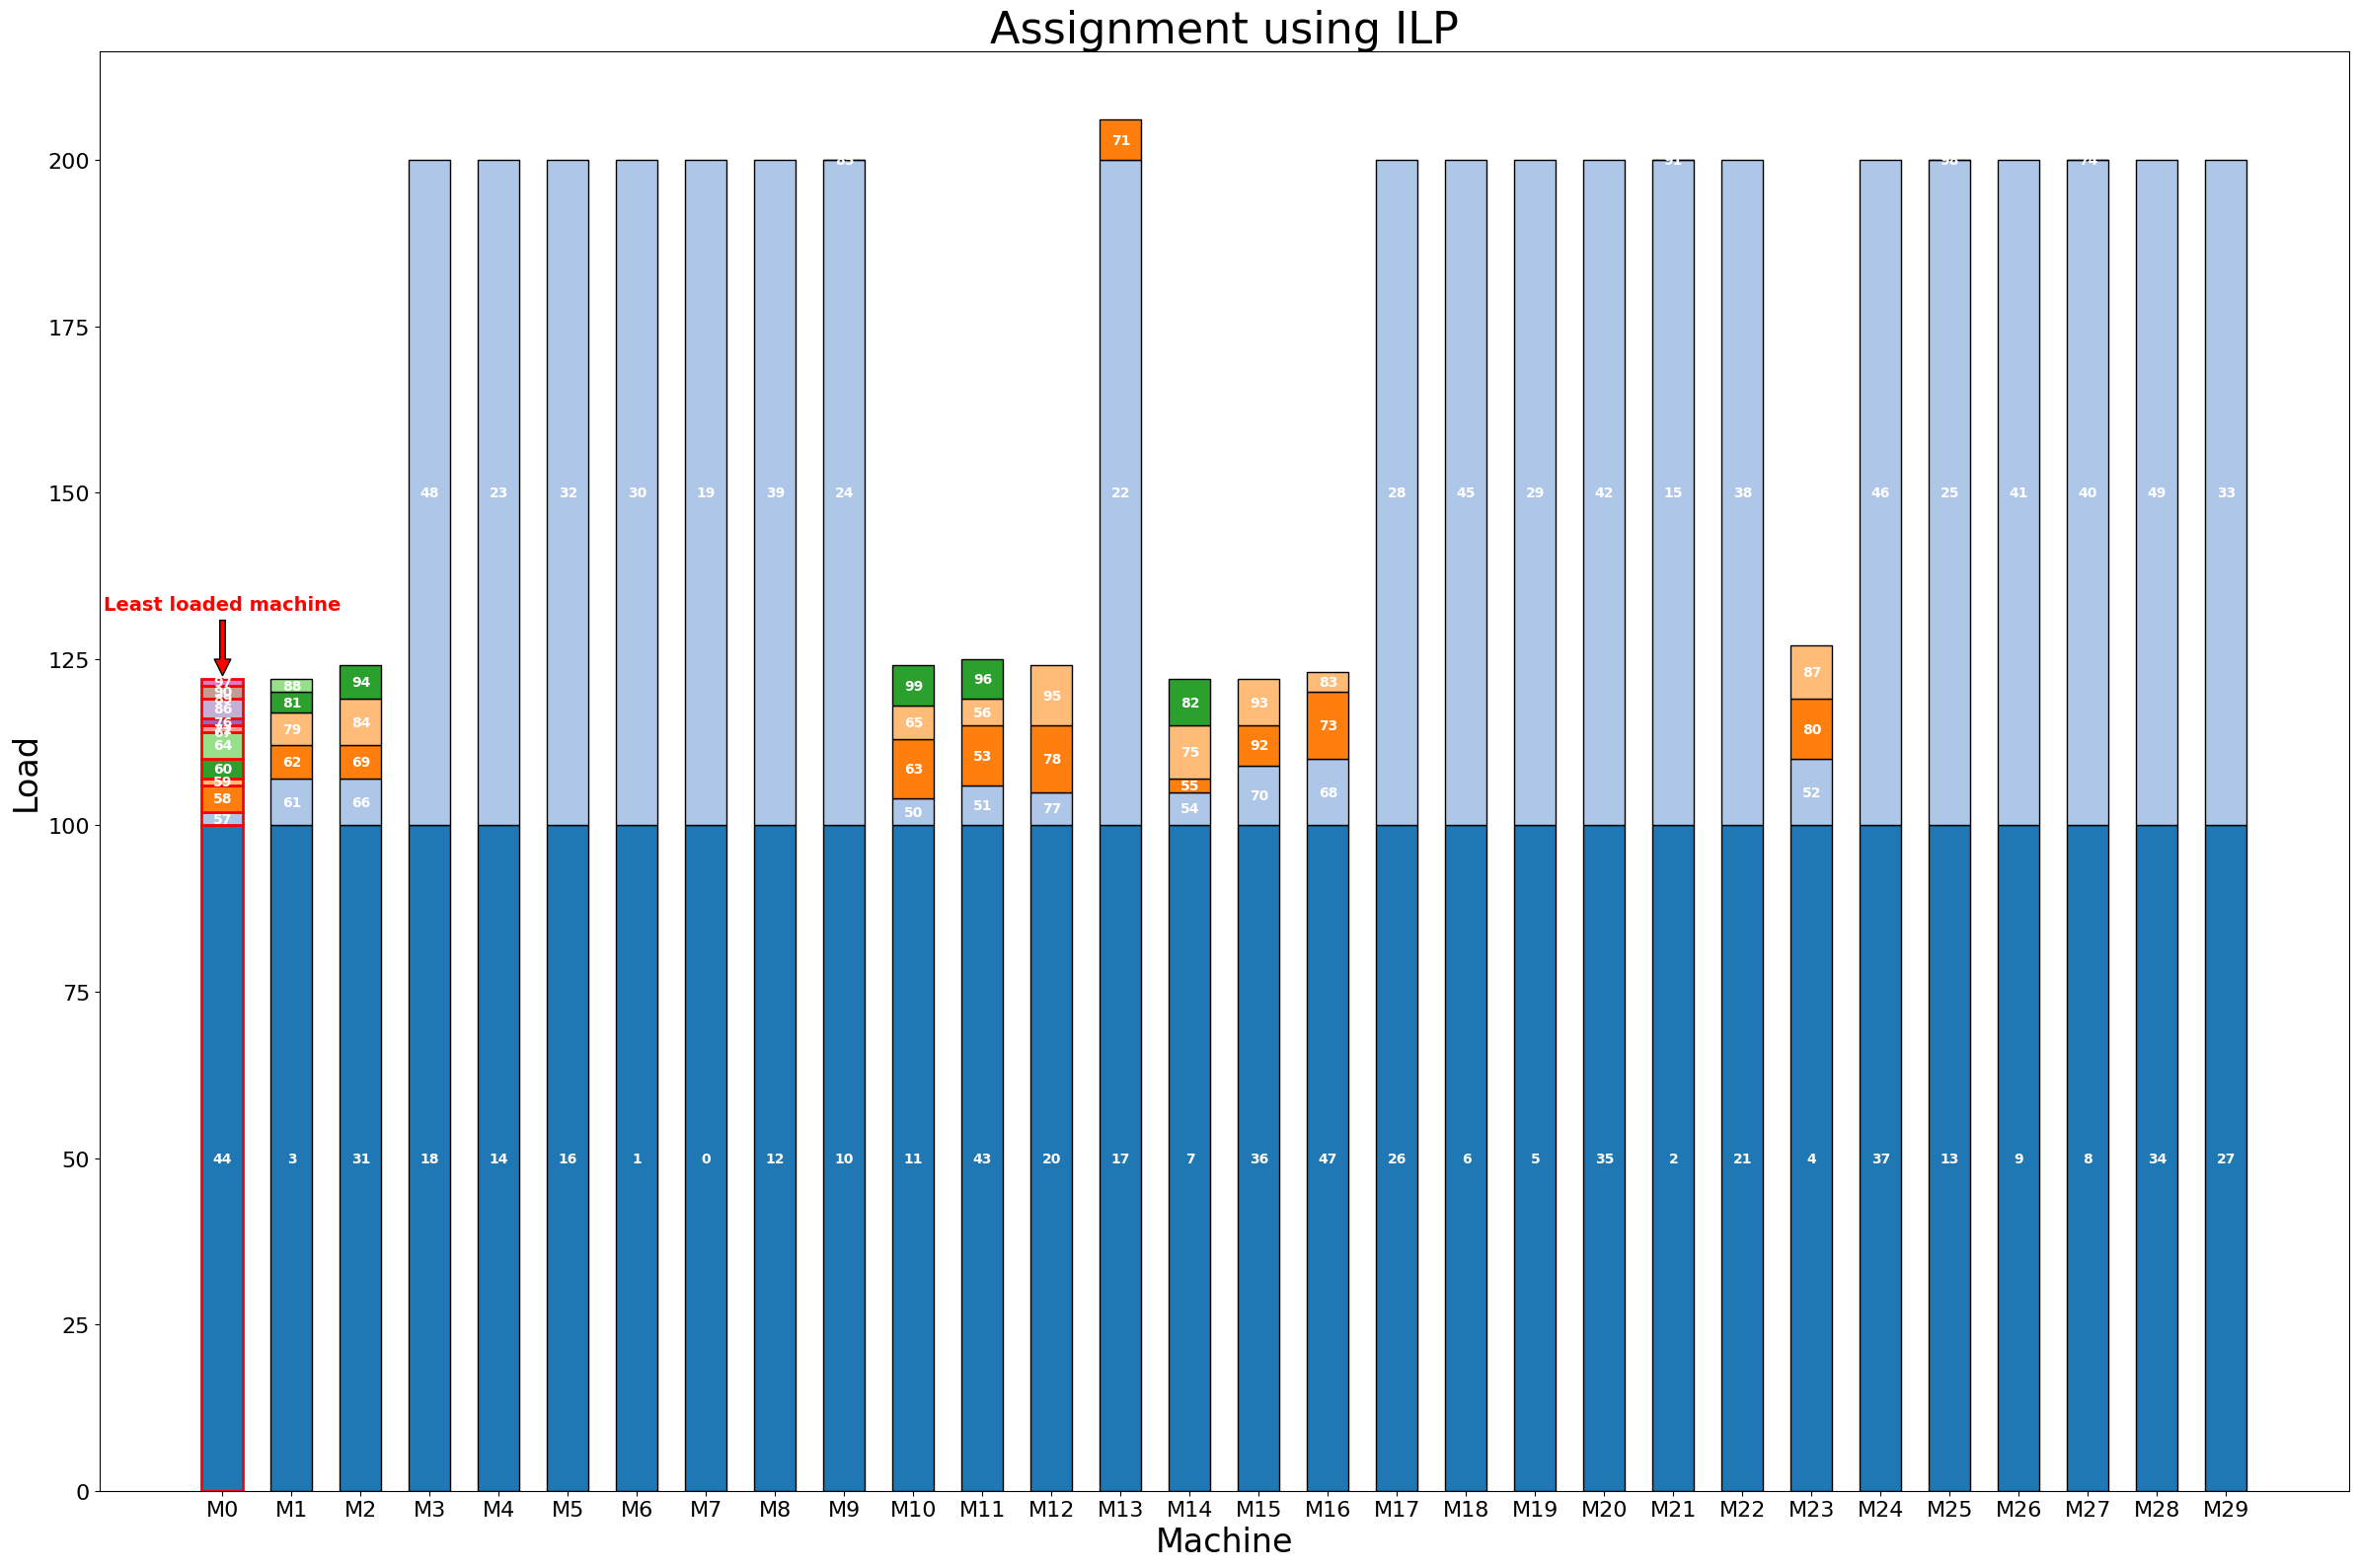

In [ ]:

values = [machine.getDict() for machine in machines_ip.values()]
plotear(values, "ILP")

In [ ]:
values

[{14: 100, 52: 4, 62: 2, 72: 2, 77: 6, 86: 1, 92: 10},
 {3: 100, 50: 3, 58: 3, 63: 1, 66: 10, 73: 9, 81: 3},
 {40: 100, 69: 6, 76: 10, 93: 7},
 {29: 100, 43: 100, 85: 0},
 {34: 100, 39: 100},
 {12: 100, 42: 100},
 {0: 100, 8: 100, 80: 5, 90: 0},
 {1: 100, 33: 100},
 {15: 100, 44: 100},
 {20: 100, 22: 100},
 {48: 100, 51: 2, 64: 10, 83: 2, 88: 7, 97: 3},
 {21: 100, 60: 5, 71: 3, 96: 9, 98: 6},
 {4: 100, 53: 6, 57: 1, 70: 4, 75: 5, 95: 10},
 {13: 100, 61: 6, 74: 4, 87: 5, 99: 9},
 {47: 100, 55: 9, 67: 2, 68: 7, 89: 6},
 {11: 100, 18: 100},
 {31: 100, 54: 6, 56: 9, 65: 8},
 {35: 100, 41: 100},
 {10: 100, 49: 100, 78: 3, 84: 6},
 {5: 100, 6: 100, 91: 5},
 {27: 100, 36: 100},
 {26: 100, 30: 100},
 {19: 100, 28: 100},
 {16: 100, 79: 9, 82: 10, 94: 10},
 {9: 100, 24: 100},
 {25: 100, 45: 100},
 {2: 100, 32: 100, 59: 0},
 {7: 100, 38: 100},
 {17: 100, 23: 100},
 {37: 100, 46: 100}]

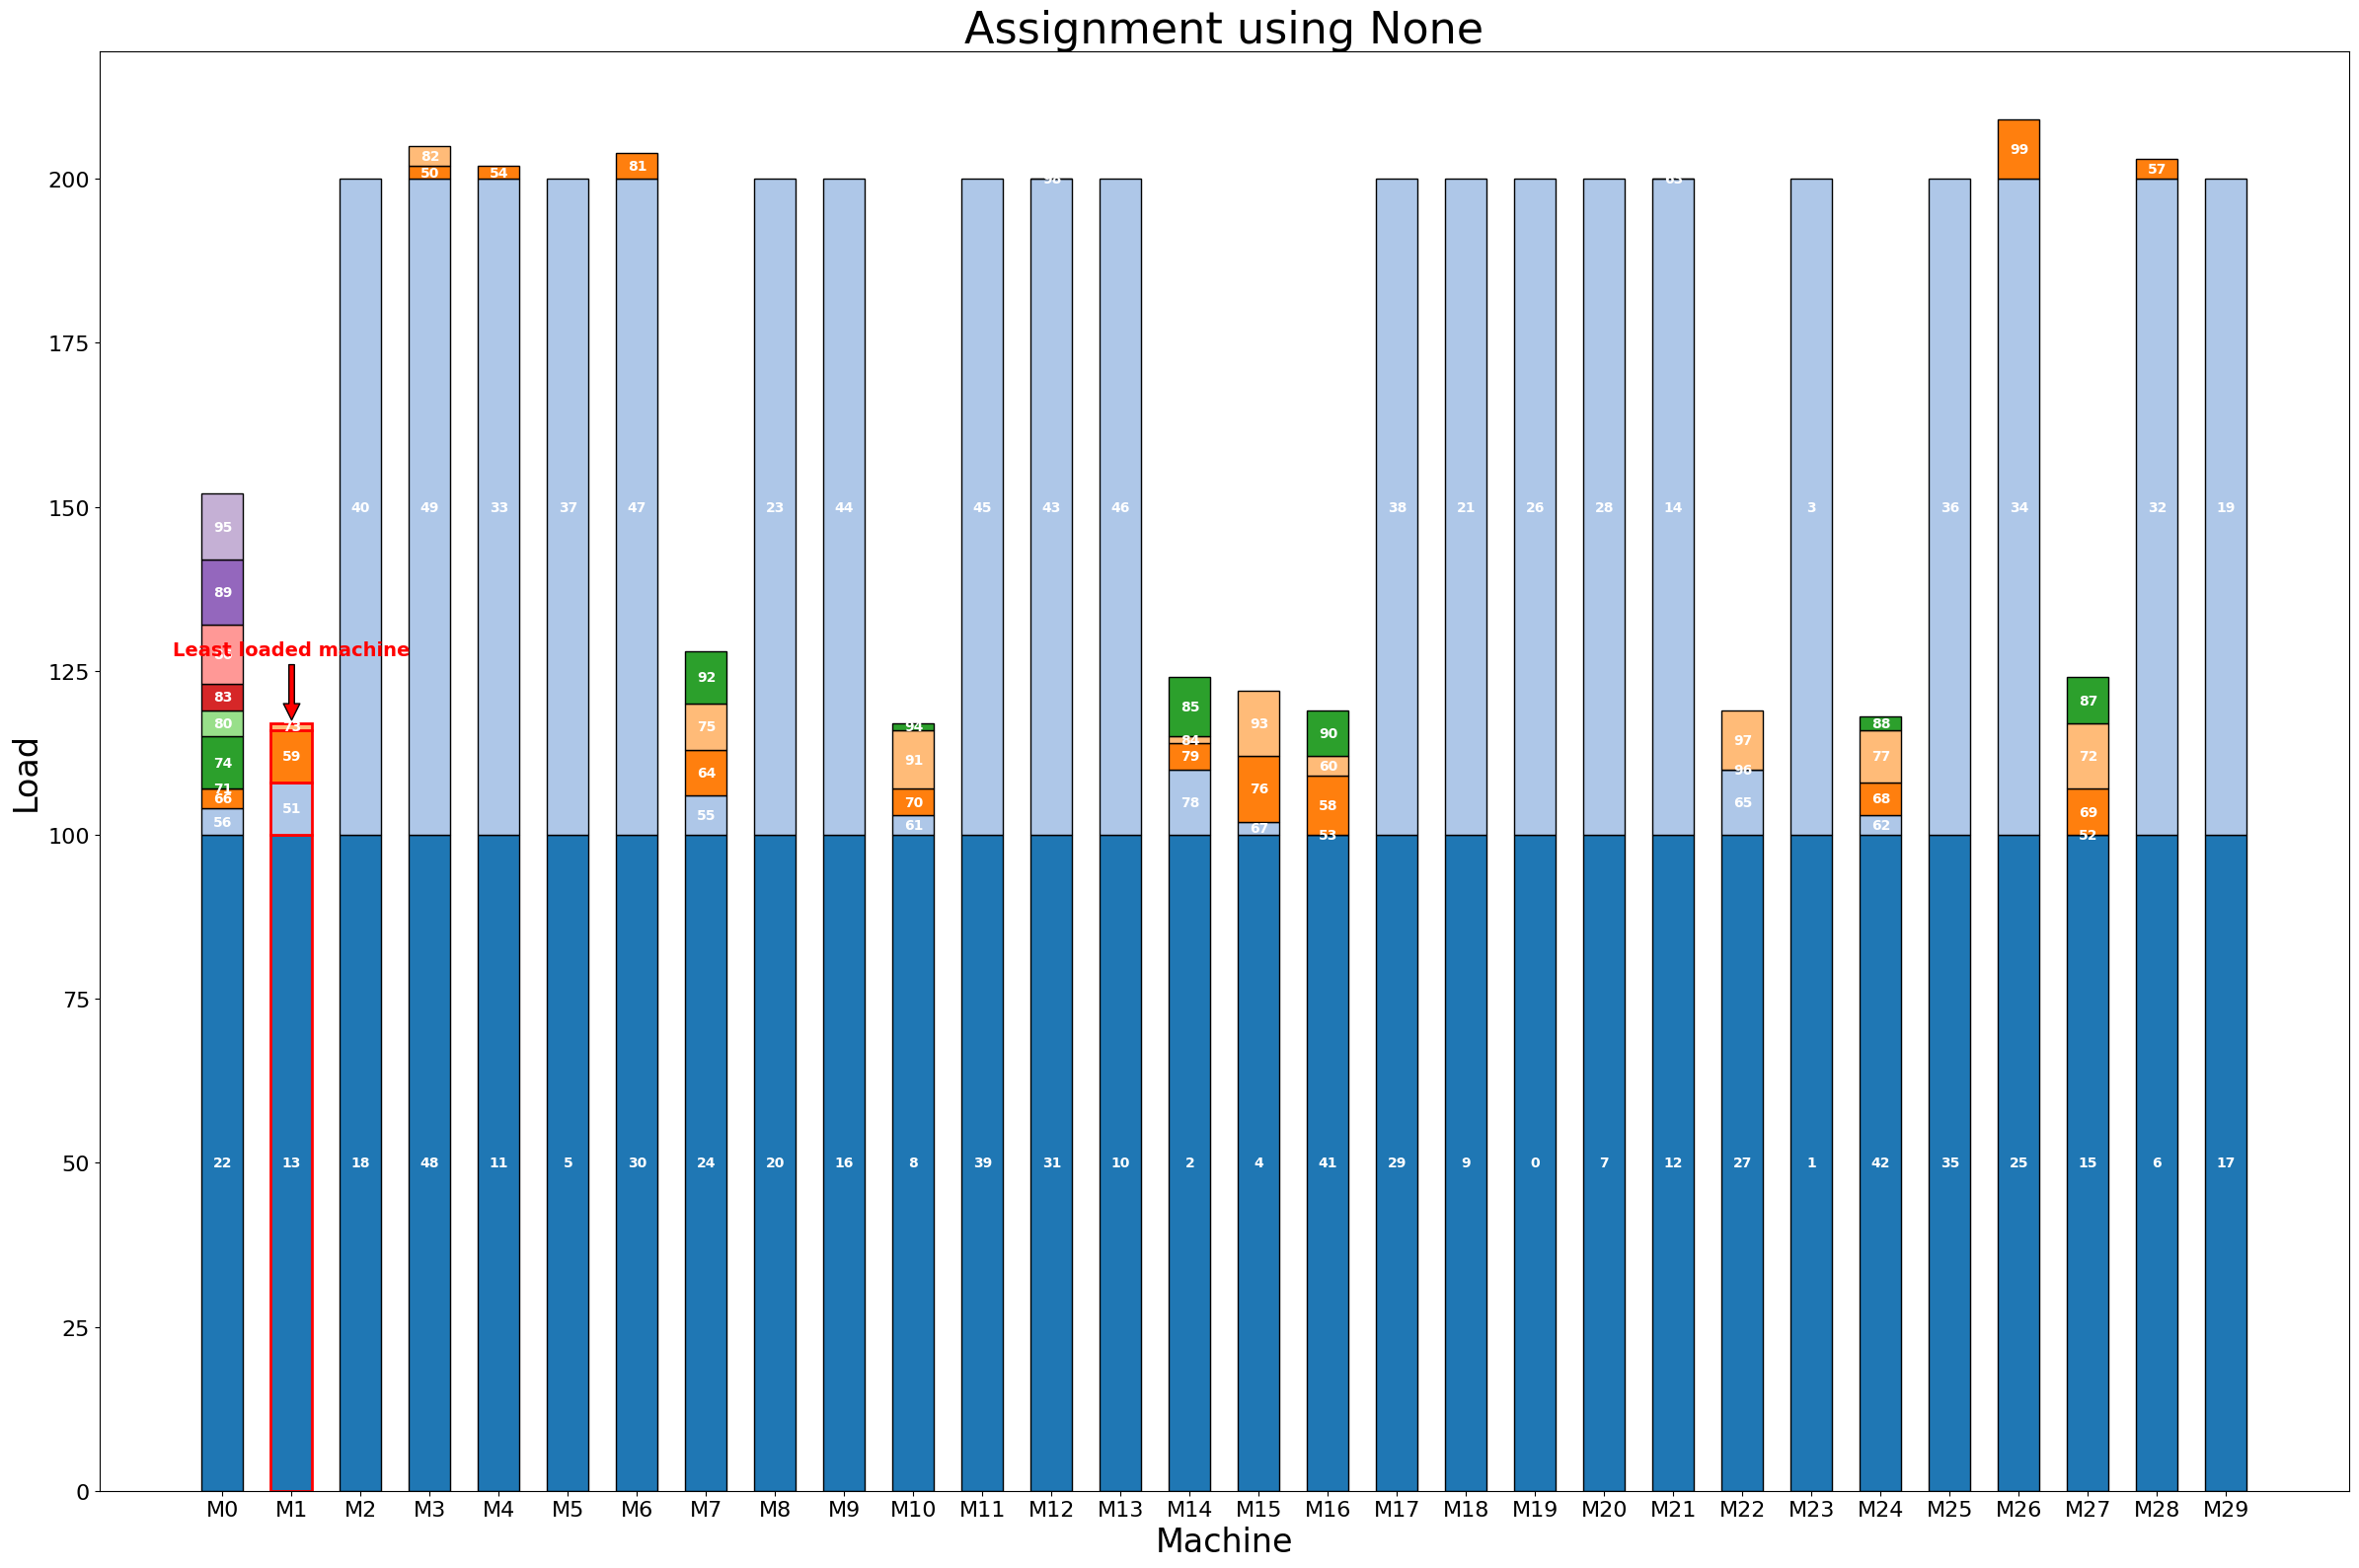

In [ ]:
plotear(values)

In [ ]:
m

30

In [ ]:
#Algoritmo propio
#IP
machines_second = generateMachines(m)
alg = MergeAlgorithmn(machines_second, jobs, opt, ro = 2*opt)
alg.run()

correremos fill con ro


In [ ]:
#Test with 0.5*opt
value_cero_cinco_merge = prom_opt(4*m,jobs_1)

TypeError: prom_opt() missing 2 required positional arguments: 'method' and 'ro'

In [ ]:
value_cero_cinco

82.83333333333333

### Testing for bad instance

In [ ]:
#Azar
value_azar = prom_opt(4*m,jobs_1, "azar", 1)
#Merge}}}
value_merge = prom_opt(4*m,jobs_1, "merge", ro=0.5*opt)
value_merge_2opt = prom_opt(4*m,jobs_1, "merge", ro=2*opt)
#Greedy
machines_grd = generateMachines(m)
alg = GreedyAlgorithm(machines_grd,jobs_1)
alg.run()
value_greedy = alg.getOpt()

#OPT
# opt = model.getOpt()
machines_opt = generateMachines(m)
alg_fill = OptAlgorithm(machines_opt,jobs_1)
alg_fill.run(opt, 1)
value_fill = alg_fill.getOpt()

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Corriendo algoritmo de Azar
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to asign
0
Using greedy to

In [ ]:

print(f"Valor optimo {opt} | Azar {value_azar} | Merge {value_merge} | Merge 2opt {value_merge_2opt} | Greedy {value_greedy} | Fill {value_fill}")

NameError: name 'opt' is not defined

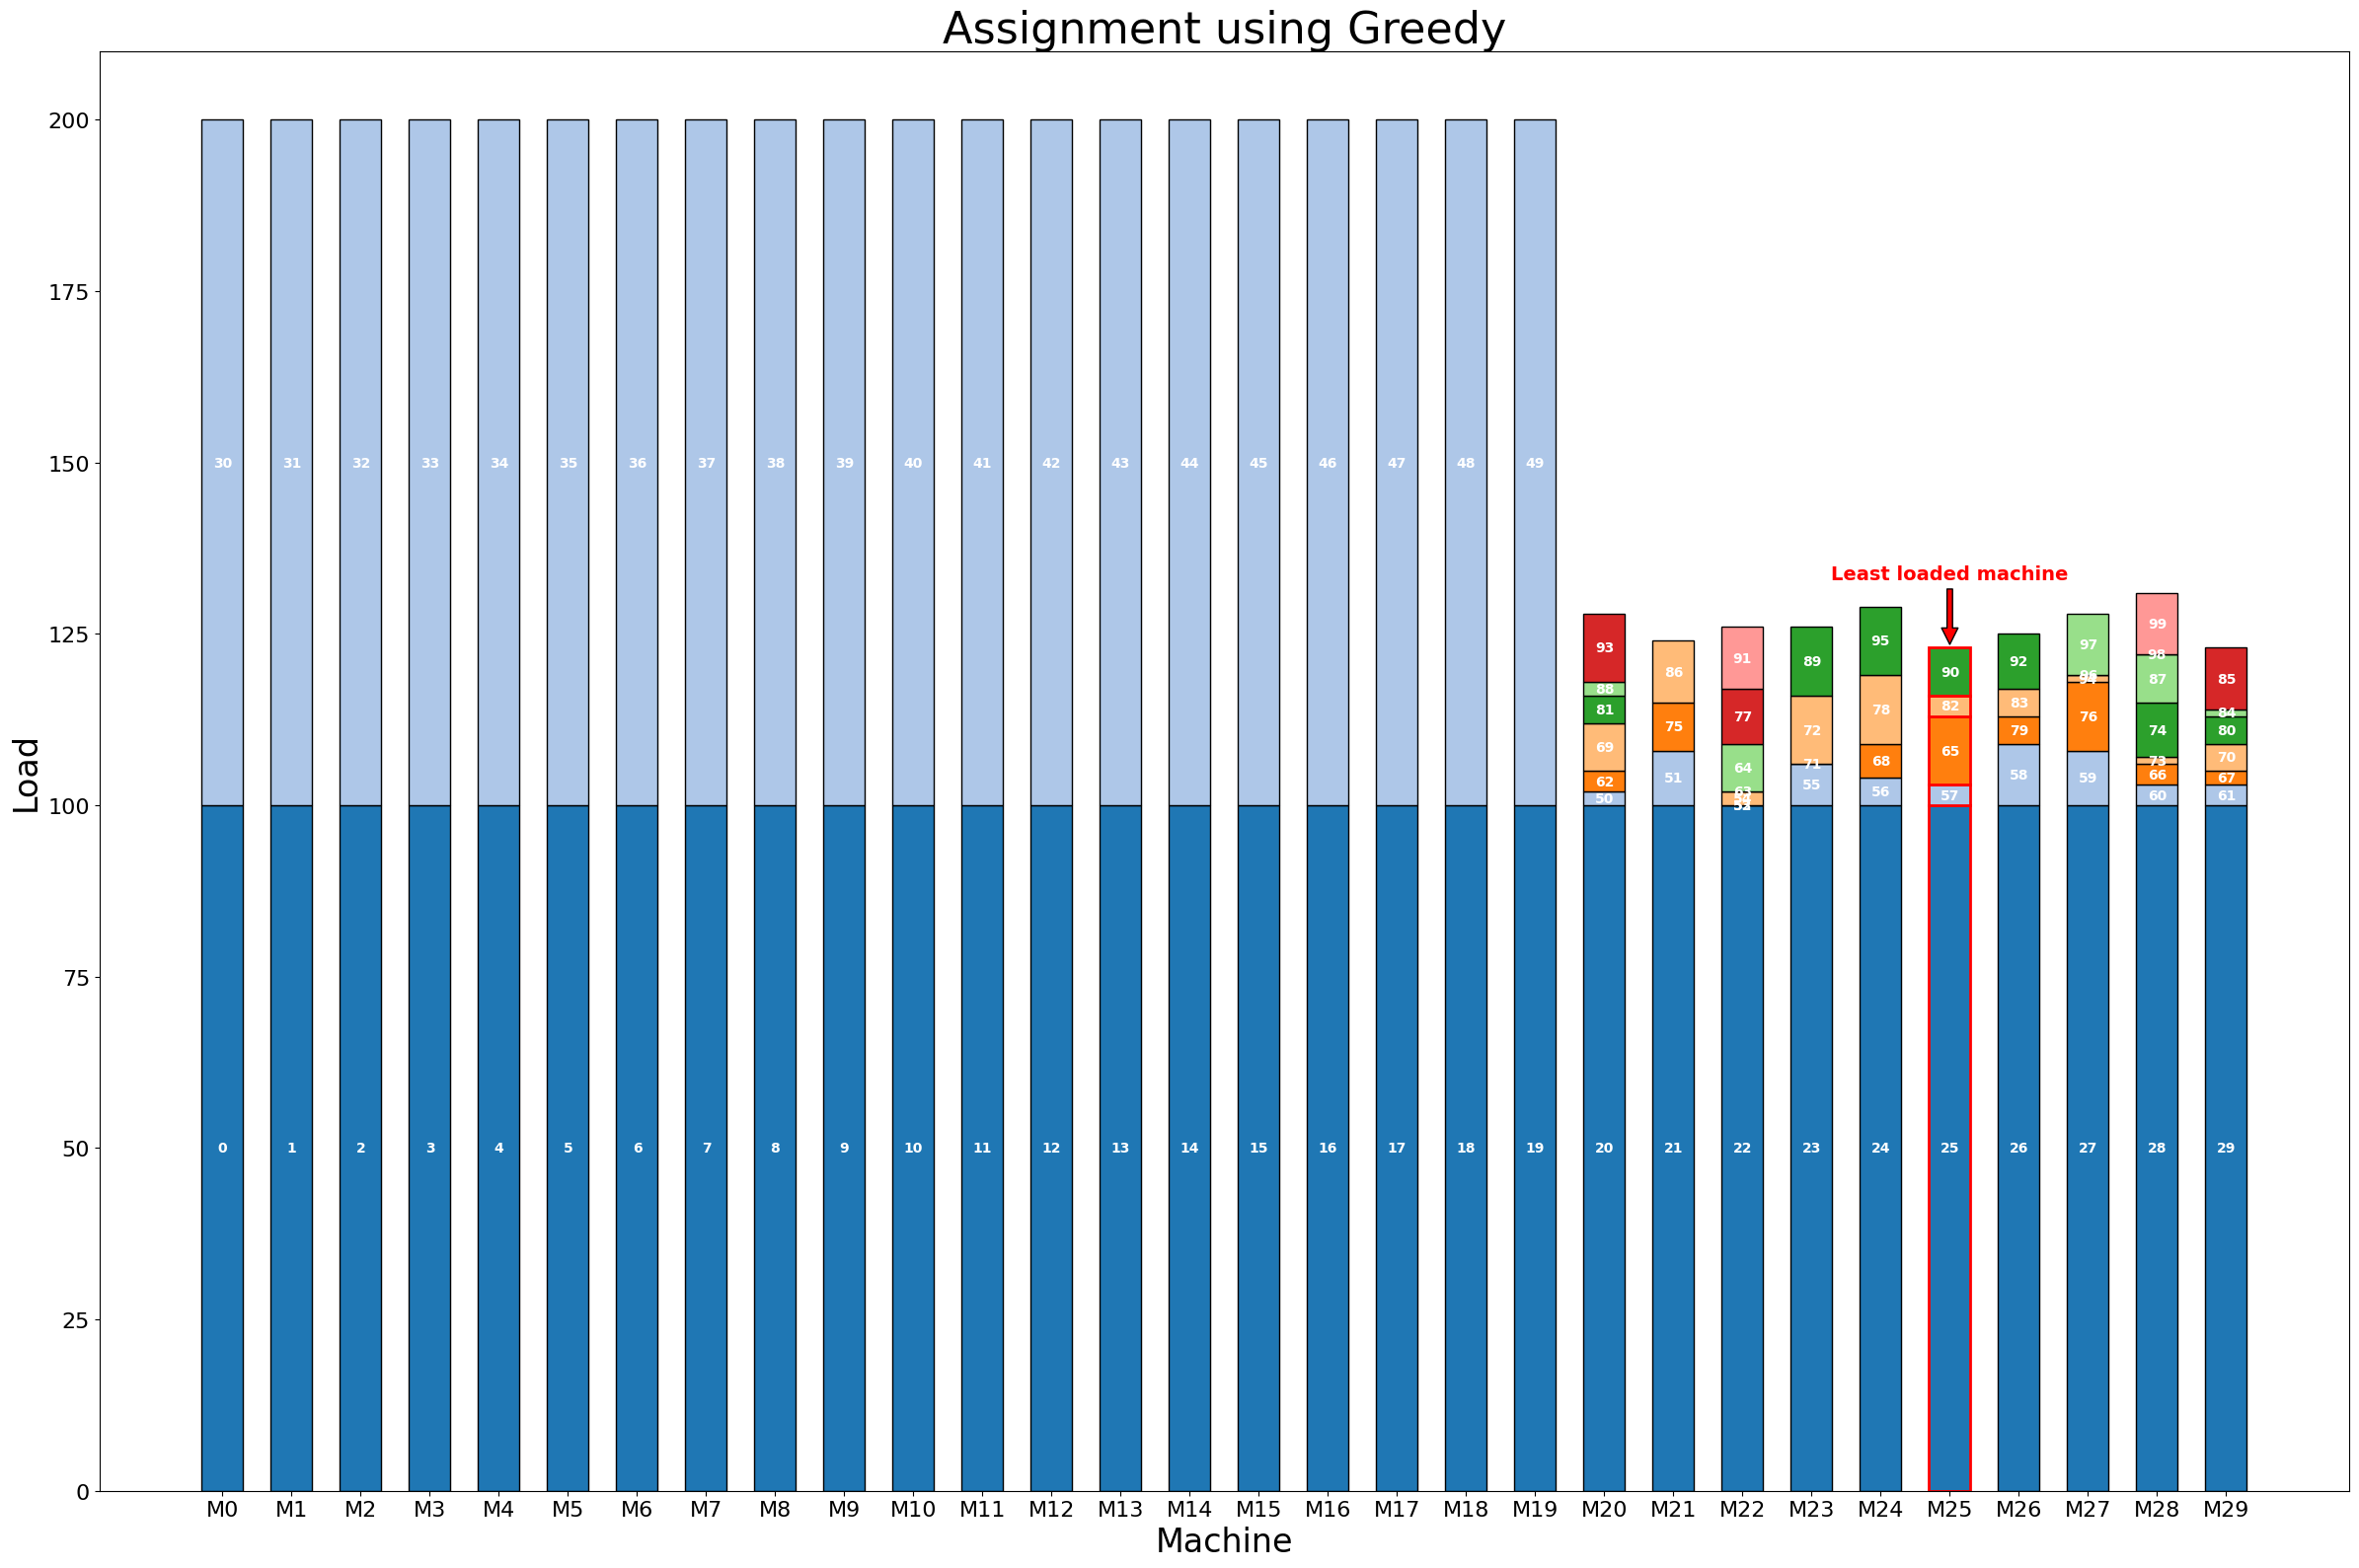

In [ ]:
values = [machine.getDict() for machine in machines_grd.values()]
plotear(values, "Greedy")

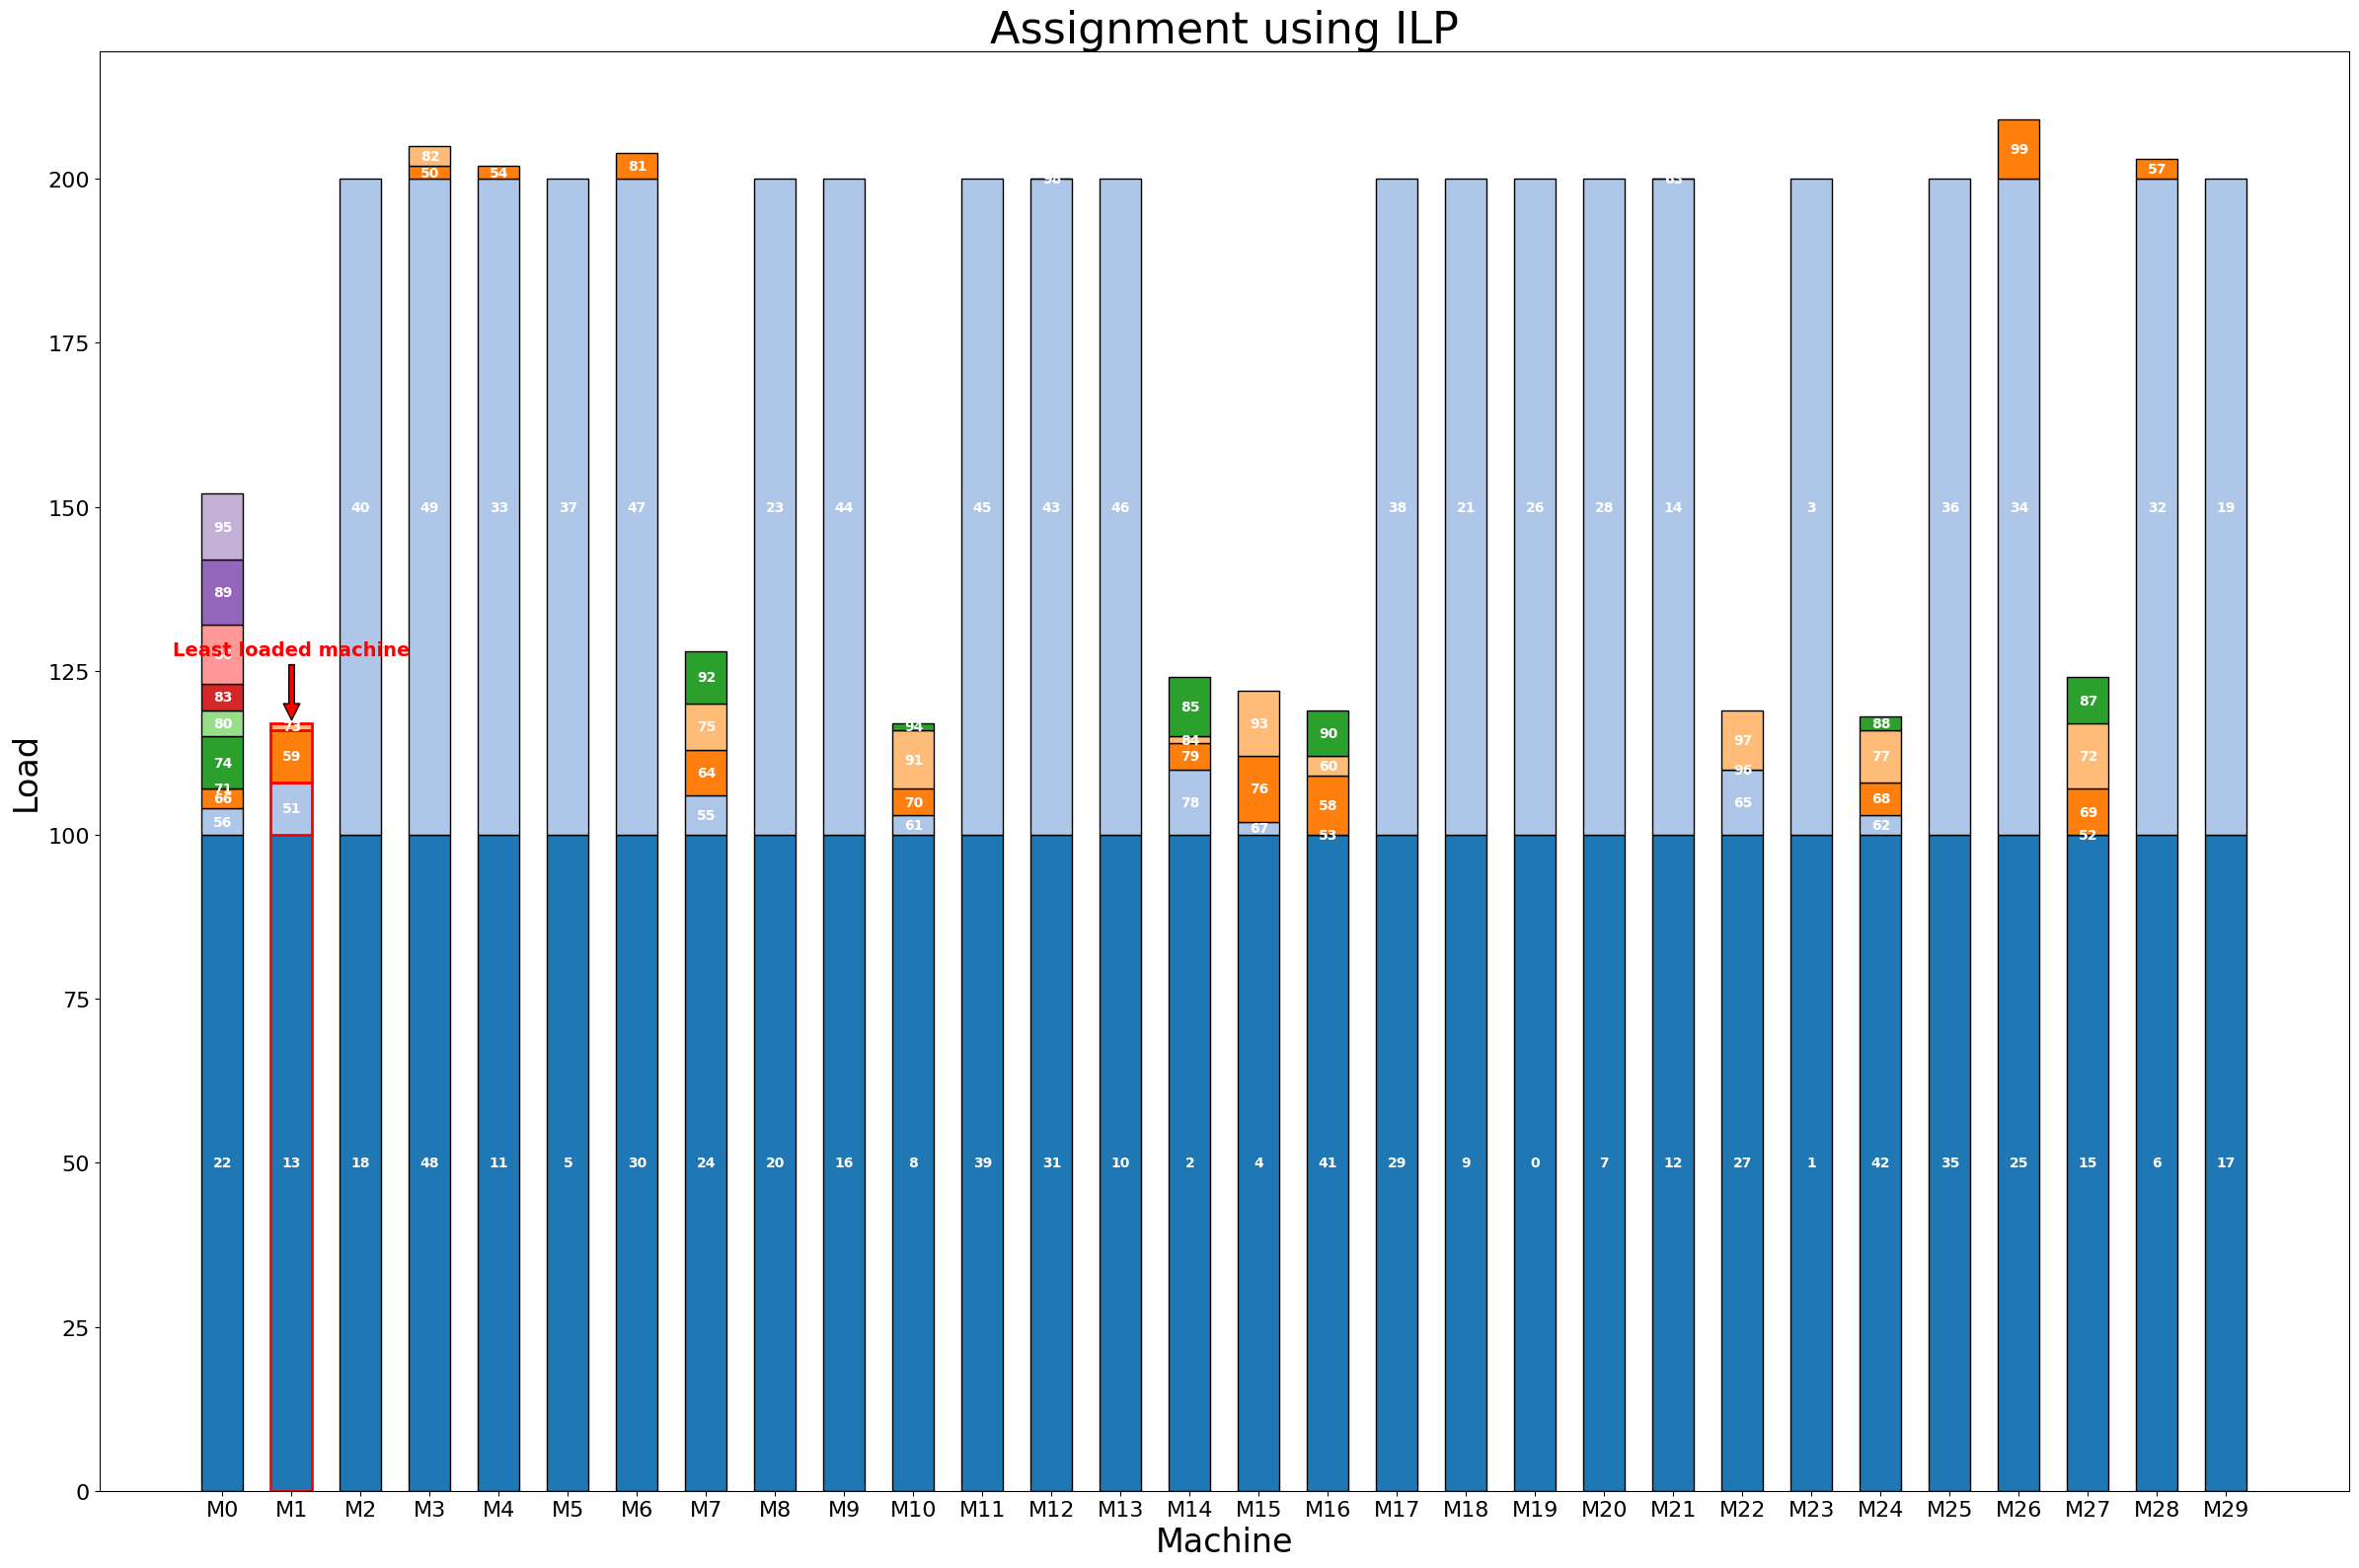

In [ ]:
values = [machine.getDict() for machine in machines_ip.values()]
plotear(values, "ILP")

### Segundo test con malas instancias

Primero tareas chicas y luego las grandes

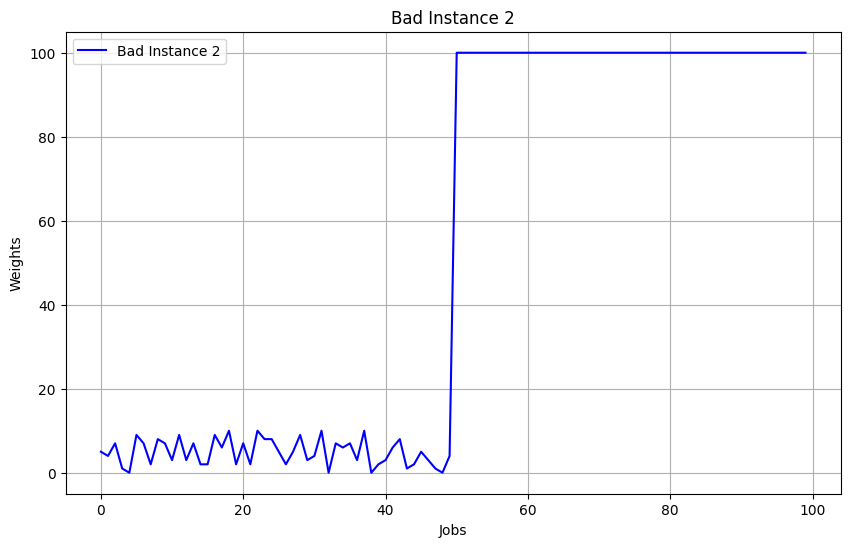

In [ ]:
gen = Generator()
jobs_2 = gen.generateBad2(n)
gen.plotDistribution()


In [ ]:
print(jobs_2)

{0: {'weight': 5}, 1: {'weight': 4}, 2: {'weight': 7}, 3: {'weight': 1}, 4: {'weight': 0}, 5: {'weight': 9}, 6: {'weight': 7}, 7: {'weight': 2}, 8: {'weight': 8}, 9: {'weight': 7}, 10: {'weight': 3}, 11: {'weight': 9}, 12: {'weight': 3}, 13: {'weight': 7}, 14: {'weight': 2}, 15: {'weight': 2}, 16: {'weight': 9}, 17: {'weight': 6}, 18: {'weight': 10}, 19: {'weight': 2}, 20: {'weight': 7}, 21: {'weight': 2}, 22: {'weight': 10}, 23: {'weight': 8}, 24: {'weight': 8}, 25: {'weight': 5}, 26: {'weight': 2}, 27: {'weight': 5}, 28: {'weight': 9}, 29: {'weight': 3}, 30: {'weight': 4}, 31: {'weight': 10}, 32: {'weight': 0}, 33: {'weight': 7}, 34: {'weight': 6}, 35: {'weight': 7}, 36: {'weight': 3}, 37: {'weight': 10}, 38: {'weight': 0}, 39: {'weight': 2}, 40: {'weight': 3}, 41: {'weight': 6}, 42: {'weight': 8}, 43: {'weight': 1}, 44: {'weight': 2}, 45: {'weight': 5}, 46: {'weight': 3}, 47: {'weight': 1}, 48: {'weight': 0}, 49: {'weight': 4}, 50: {'weight': 100}, 51: {'weight': 100}, 52: {'weight'

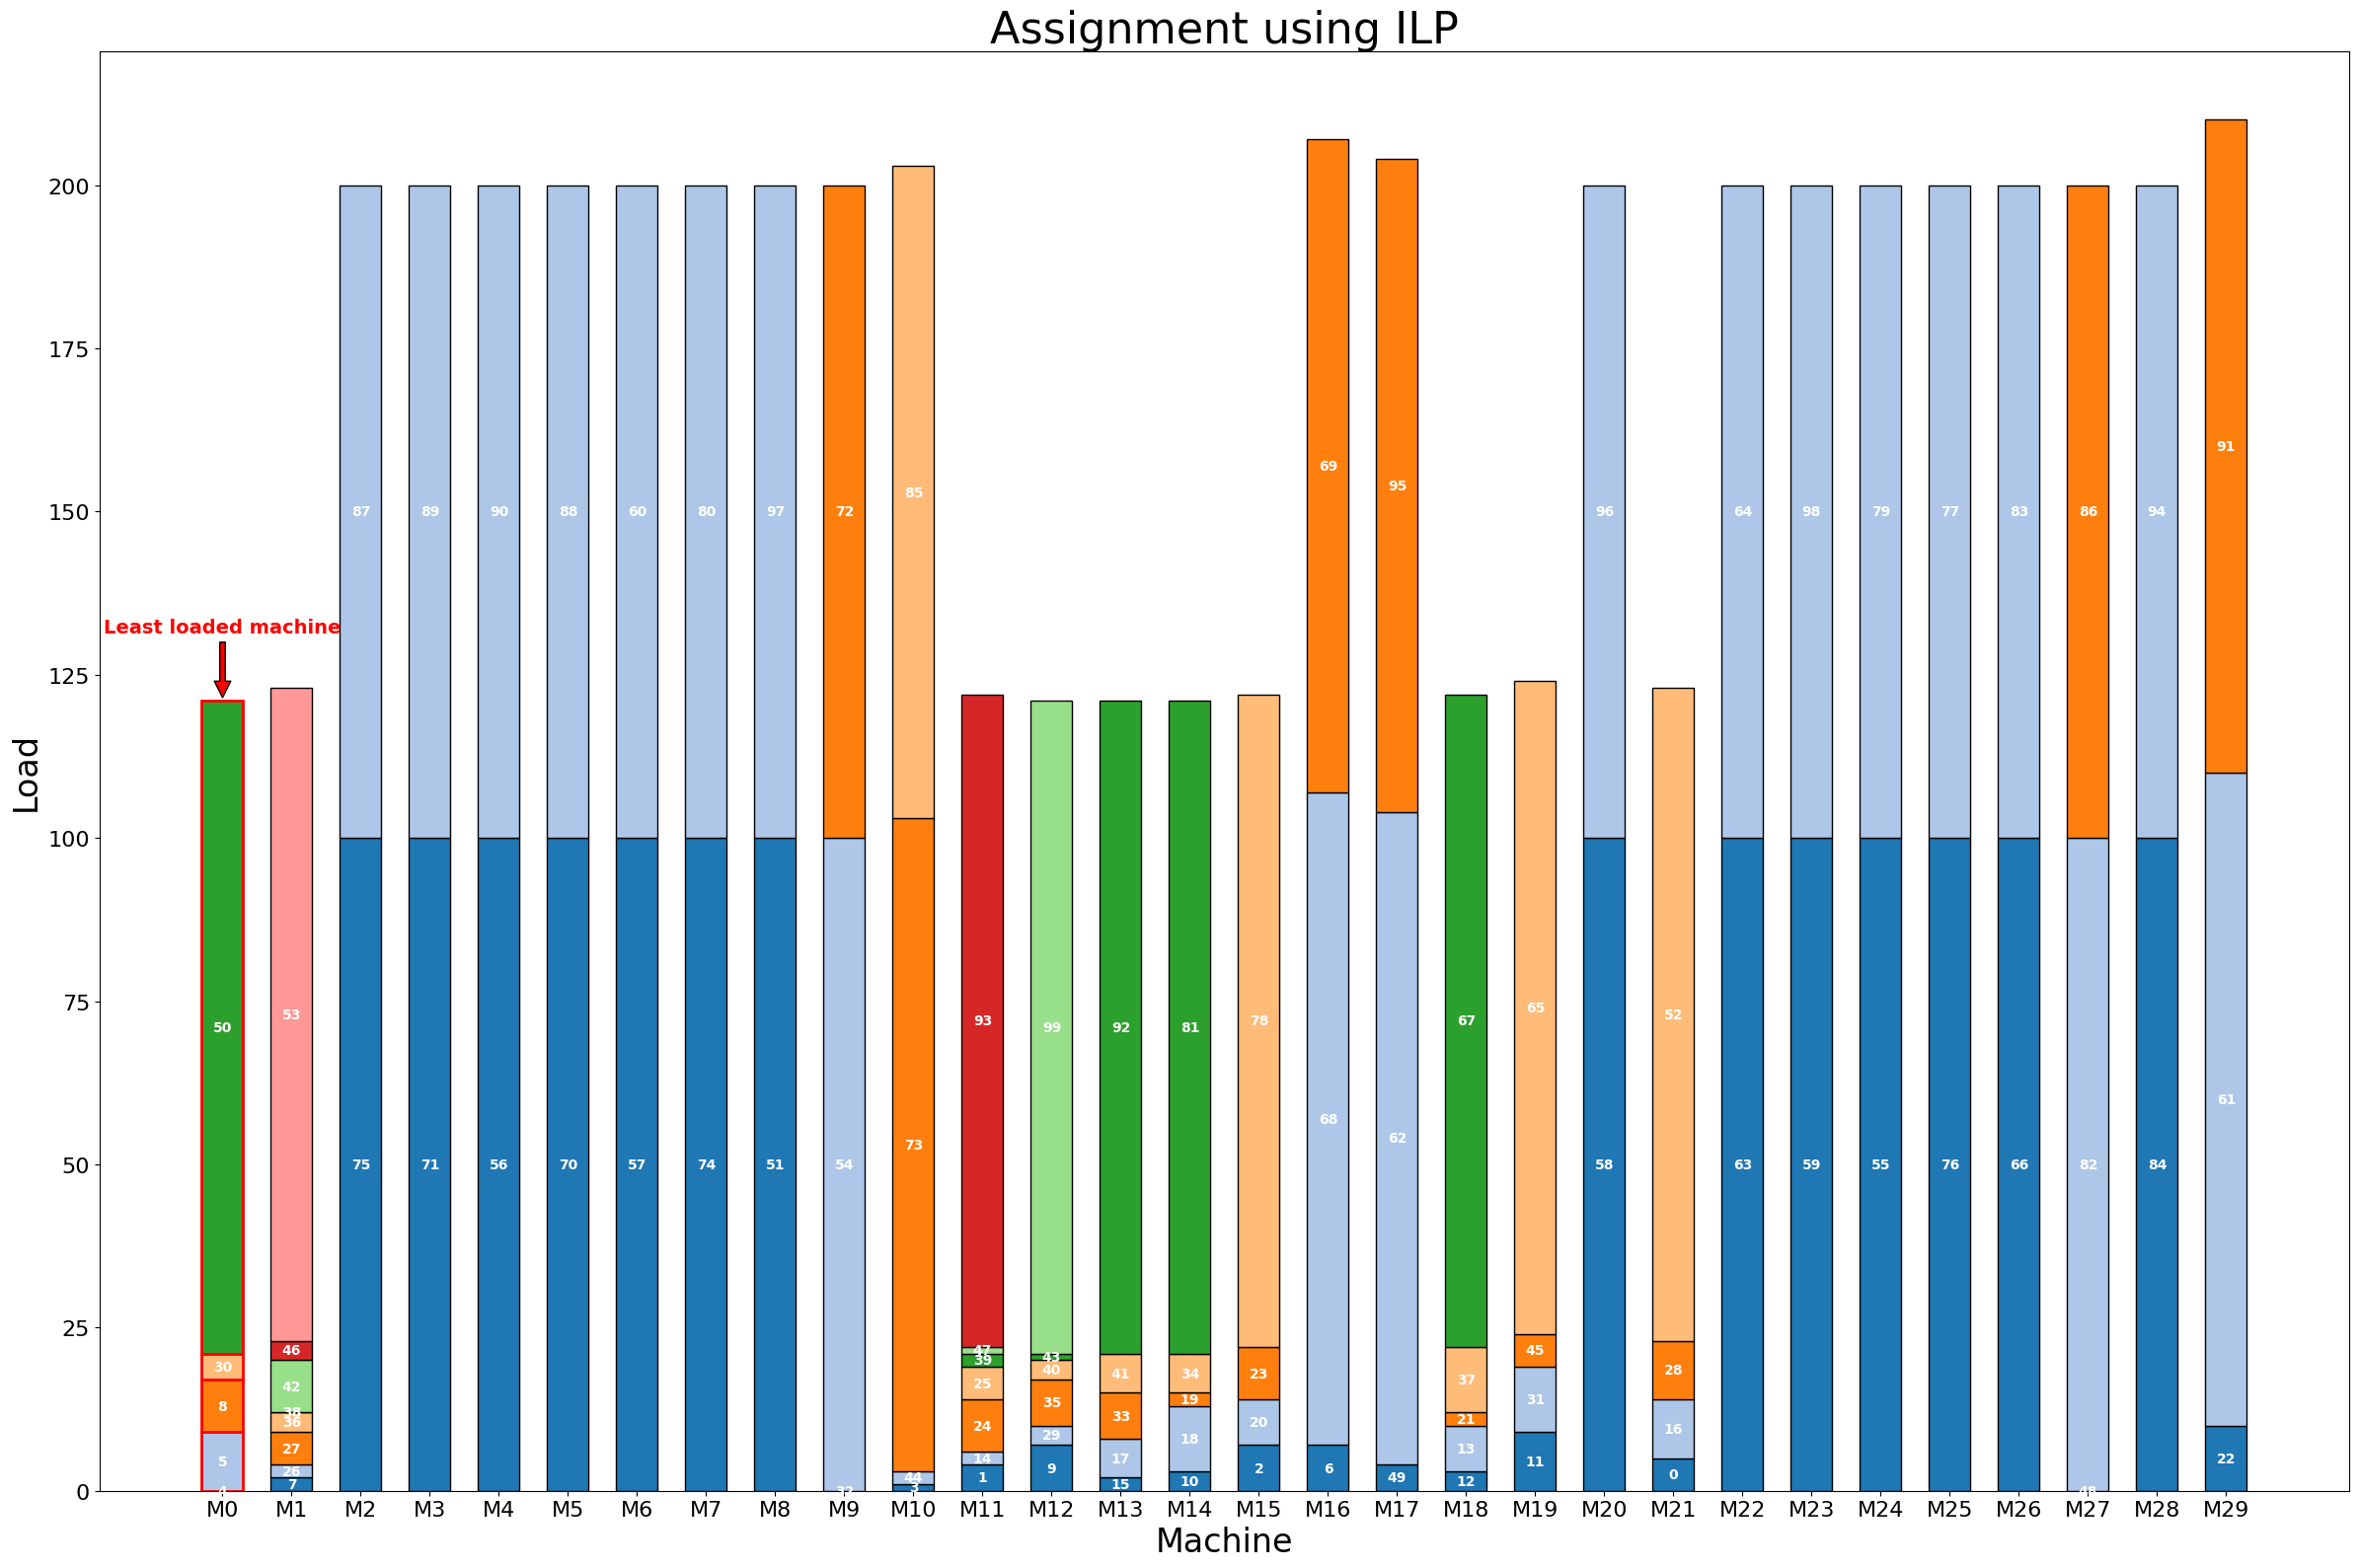

In [ ]:
#IP
machines_ip = generateMachines(m)

# model = Model(machines=machines_ip,jobs=jobs)
model = JobSchedulingModel(machines=machines_ip,jobs=jobs_2)
model.run()
opt = model.getOpt()
model.getSolution()
values = [machine.getDict() for machine in machines_ip.values()]
plotear(values, "ILP")

In [ ]:
#Azar
value_azar = prom_opt(4*m,jobs_2, "azar", 1)
#Merge}}}
value_merge = prom_opt(4*m,jobs_2, "merge", ro=0.5*opt)
value_merge_2opt = prom_opt(4*m,jobs_2, "merge", ro=2*opt)
#Greedy
machines_grd = generateMachines(m)
alg = GreedyAlgorithm(machines_grd,jobs_2)
alg.run()
value_greedy = alg.getOpt()

#OPT
# opt = model.getOpt()
machines_opt = generateMachines(m)
alg_fill = OptAlgorithm(machines_opt,jobs_2)
alg_fill.run(opt, 1)
value_fill = alg_fill.getOpt()
print(f"Valor optimo {opt} | Azar {value_azar} | Merge {value_merge} | Merge 2opt {value_merge_2opt} | Greedy {value_greedy} | Fill {value_fill}")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
Asignando a las maquinas pequenas
100
correremos fill con ro
correremos fill con ro/2
Corriendo algoritmo de Azar
0
0
0
0
0
Asignando a las maquinas pequenas
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0